# Tema proiectului


Explicatie: Sunt un analist de date pentru Delta Bank. Scopul meu este sa aflu de ce ar ramane sau de ce ar pleca clientii din sistemul bancii, deoarece conducerea vrea sa-si imbunatateasca relatia pe care o are cu fiecare clienti in parte. 

# A. Importarea bibliotecilor


In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve

# B. Citirea setului de date


In [165]:
path='C:\\Users\\Gucci\\Desktop\\TTJ project\\TTJ project\\dataset\\dataset.csv'

In [166]:
data=pd.read_csv(path)

# C. Afisarea, prelucrarea si analiza datelor din documente


1. Facem o previzualizare a datelor si o verificare a dimensiunii datelor

In [167]:
#dimensiune
data.shape

(10127, 22)

In [168]:
#previzualizare a datelor, se va face cu functia data.head()

data.head(20)

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,1,45.0,M,3.0,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144.0,42,1.526,0.061
1,1,818770008,1,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291.0,33,1.526,0.105
2,2,713982108,1,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,1.543,1887.0,20,1.526,0.000
3,3,769911858,1,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171.0,20,1.526,0.760
4,4,709106358,1,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,1.543,816.0,28,1.526,0.000
5,5,713061558,1,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,...,1,2,4010.0,1247,2763.0,1.376,1088.0,24,0.846,0.311
6,6,810347208,1,51.0,M,4.0,Unknown,Married,$120K +,Gold,...,1,3,34516.0,2264,32252.0,1.543,1330.0,31,0.722,0.066
7,7,818906208,1,32.0,M,0.0,High School,Unknown,$60K - $80K,Silver,...,2,2,29081.0,1396,27685.0,1.543,1538.0,36,0.714,0.048
8,8,710930508,1,37.0,M,3.0,Uneducated,Single,$60K - $80K,Blue,...,2,0,22352.0,2517,19835.0,1.543,1350.0,24,1.182,0.113
9,9,719661558,1,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,...,3,3,11656.0,1677,9979.0,1.524,1441.0,32,0.882,0.144


2. Acuma trebuie sa vedem ce coloane avem si ce tipuri de date (int64, float, object, String) se afla in acele coloane

In [169]:
coloane=data.columns
print(coloane)

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal',
       'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [170]:
data.dtypes

Unnamed: 0                    int64
CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Observam ca avem 21 de coloane, care ofera diverse informatii precum varsta, venitul, nivelul de educatie, statutul civil, samd despre un client al bancii, iar datele intalnite au fie o forma de float, int sau de object

3. Trebuie aflat informatii despre setul de date

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   CLIENTNUM                 10127 non-null  int64  
 2   Attrition_Flag            10127 non-null  int64  
 3   Customer_Age              10127 non-null  float64
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  float64
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

4. Cautam date statistice relevante pentru analiza noastra precum valorile minime, maxime, media sau abaterea standard pentru fiecare coloana in parte

In [172]:
data.describe()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,0.839340,46.326057,2.344623,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.757373,4241.487953,64.858695,0.708351,0.274894
std,2923.557422,3.690378e+07,0.367235,8.016701,1.299632,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.205501,2905.374318,23.472570,0.215713,0.275691
min,0.000000,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.543000,12497.500000,139.000000,1.526000,0.999000


In [173]:
data.describe(include=['object'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3560,9436


In [174]:
data.describe(include=['int64'])

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Used_Bal,Total_Trans_Ct
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,0.839340,35.928409,3.812580,2.341167,2.455317,1162.814061,64.858695
std,2923.557422,3.690378e+07,0.367235,7.986416,1.554408,1.010622,1.106225,814.987335,23.472570
min,0.000000,7.080821e+08,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,10.000000
25%,2531.500000,7.130368e+08,1.000000,31.000000,3.000000,2.000000,2.000000,359.000000,45.000000
50%,5063.000000,7.179264e+08,1.000000,36.000000,4.000000,2.000000,2.000000,1276.000000,67.000000
75%,7594.500000,7.731435e+08,1.000000,40.000000,5.000000,3.000000,3.000000,1784.000000,81.000000
max,10126.000000,8.283431e+08,1.000000,56.000000,6.000000,6.000000,6.000000,2517.000000,139.000000


In [175]:
data.describe(include=['float64'])

,Customer_Age,Dependent_count,Credit_Limit,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.326057,2.344623,8631.953698,7469.139637,0.757373,4241.487953,0.708351,0.274894
std,8.016701,1.299632,9088.776650,9090.685324,0.205501,2905.374318,0.215713,0.275691
min,26.000000,0.000000,1438.300000,3.000000,0.000000,510.000000,0.000000,0.000000
25%,41.000000,1.000000,2555.000000,1324.500000,0.631000,2155.500000,0.582000,0.023000
50%,46.000000,2.000000,4549.000000,3474.000000,0.736000,3899.000000,0.702000,0.176000
75%,52.000000,3.000000,11067.500000,9859.000000,0.859000,4741.000000,0.818000,0.503000
max,73.000000,5.000000,34516.000000,34516.000000,1.543000,12497.500000,1.526000,0.999000


## II. Analiza univariata pe baza variabilei target 

Variabila target va fi reprezentata de elementele care se afla in coloana Attrition_Flag. In aceasta coloana avem doua valori: Existing Customer si Attrited Customer. Daca avem Existing Customer pe o linie, inseamna ca un client este activ si nu a parasit banca. Daca apare insa Attrited Customer, avem de-a face cu un client care a renuntat. Putem folosi aceasta variabila pentru a vedea cati clienti ar putea sa paraseasca banca si cat de mare ar putea fi riscul ca acest lucru sa se intample.

Vrem sa analizam variabile target Attrition_Flag.

a) Verificam daca existe valori necompletate in coloana Atttrition_Flag din tabel

In [176]:
data['Attrition_Flag'].isnull().sum()

0

Observam ca nu exista valori necompletate in coloana Attrition_Flag, ceea ce inseamna ca fiecare client ori este inca in
banca, ori a iesit din sistemul bancii.

b) Vedem cate valori unice avem pentru variabila target si care sunt acestea

In [177]:
data['Attrition_Flag'].nunique()

2

In [178]:
data['Attrition_Flag'].unique()

array([1, 0], dtype=int64)

//aicea voi pune eu un comentariu mai tarziu

c) Vedem cate valori de tip Existing Customer si Attrited Customer exista

In [179]:
data['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

Deci, se pare ca avem 8500 de clienti integrati in sistemul bancii noastre si 1627 de clienti care au plecat.

In [180]:
data['Attrition_Flag'].value_counts()/len(data)*100

1    83.934038
0    16.065962
Name: Attrition_Flag, dtype: float64

Daca ar fi sa facem o analiza procentuala putem vedea ca 83,93% (apropae 84%) din clienti nu au parasit banca, in timp de 16,06% au facut acest pas.

d) Vom crea un grafic in care sa se afiseze distributia din variabila target Attrition_Flag

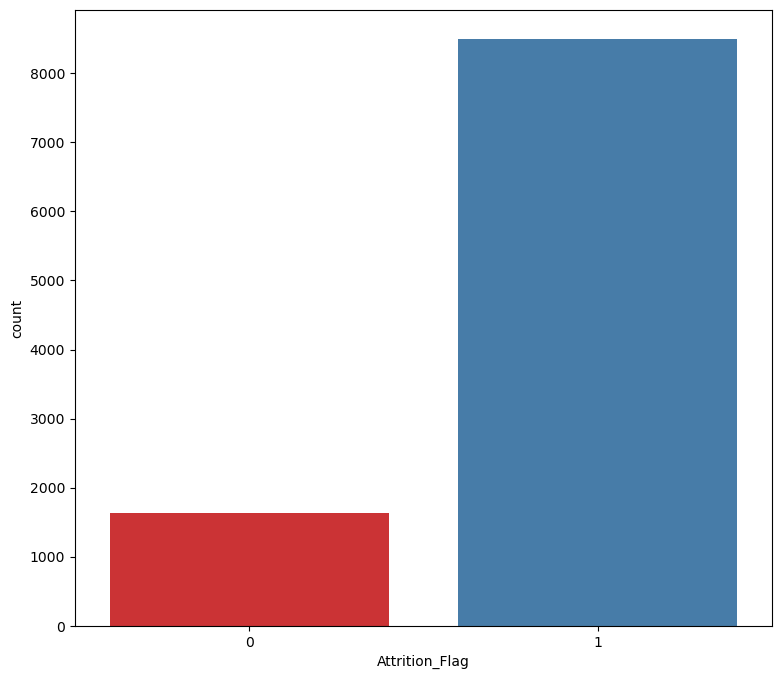

In [181]:
fig, axes=plt.subplots(figsize=(9,8))
ax=sns.countplot(data=data,x='Attrition_Flag',palette='Set1')
plt.show()

Conform graficului pezentat, se poate vedea ca sunt 8500 de clienti in sistemul actual bancar si 1627 de persoane care au migrat catre alta banca.

e) Convertim valorile din Attrition_Flag de la object la int. Acest lucru este necesar pentru a putea pregati modelul predictiv.

In [182]:
data['Attrition_Flag']=data['Attrition_Flag'].map({'Attrited Customer':0,'Existing Customer':1})

In [183]:
data['Attrition_Flag'].value_counts()

Series([], Name: Attrition_Flag, dtype: int64)

In [184]:
data['Attrition_Flag'].count()

0

## III. Analiza caracteristicilor

### Variabilele categorice

a) Trebuie mai intai sa le identificam si sa le distribuim in grafic

In [23]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [24]:
# Variabilele categorice sunt cele de tip object, deoarece ele ofera caracteristici nenumerice legate de un client
# le selectam
categorical_variables=[col for col in data.columns if data[col].dtypes=='object']

In [25]:
print('There are',len(categorical_variables),'and they are the following ones:',categorical_variables)

There are 5 and they are the following ones: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


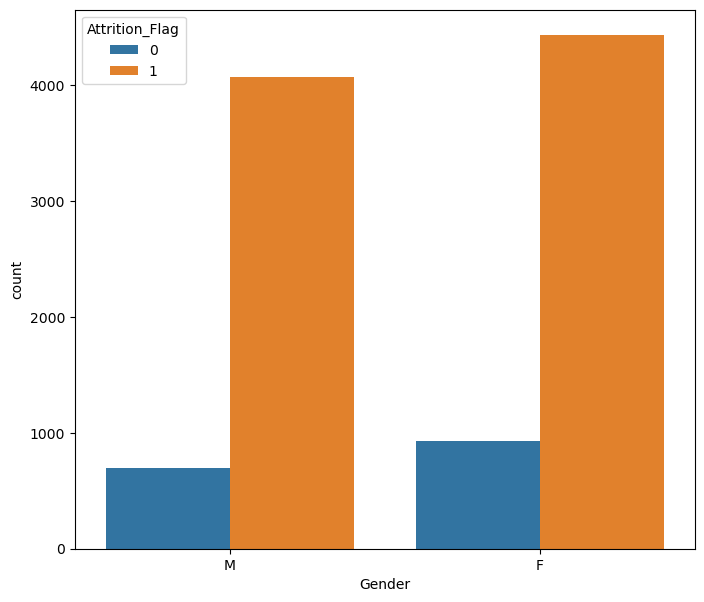

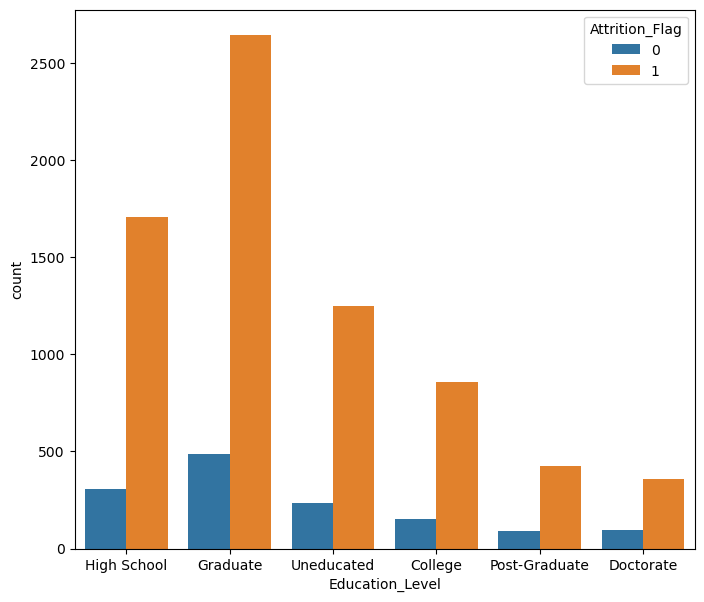

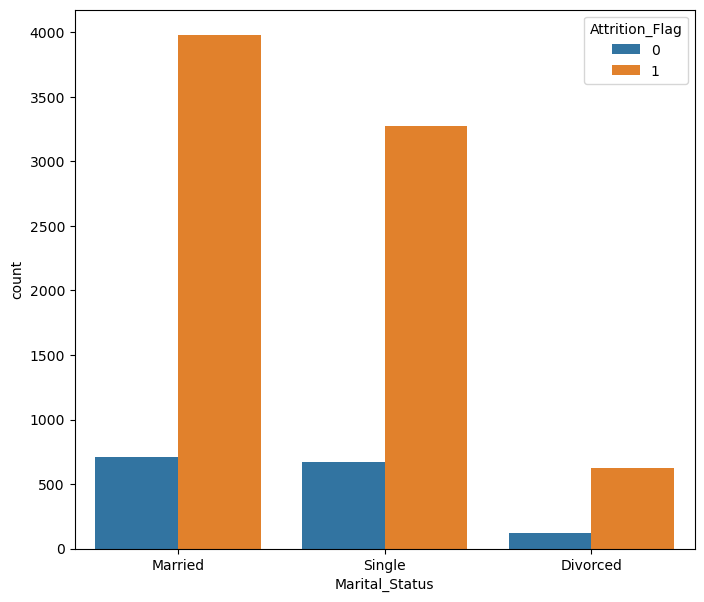

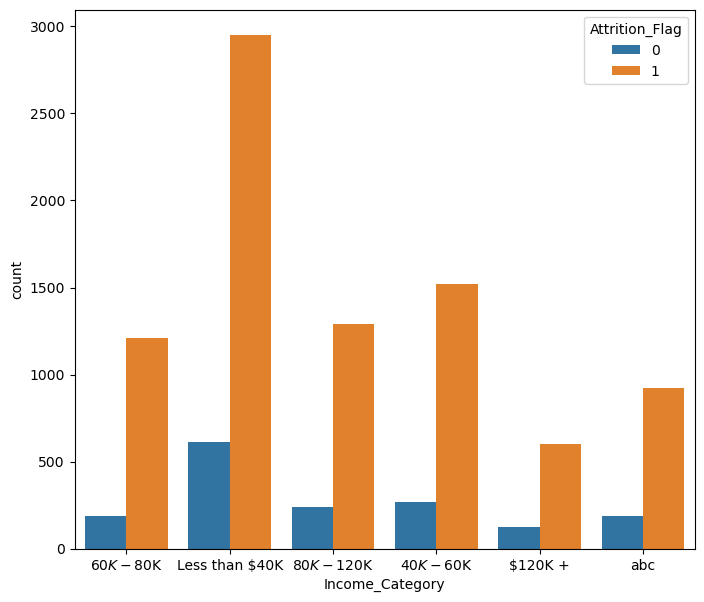

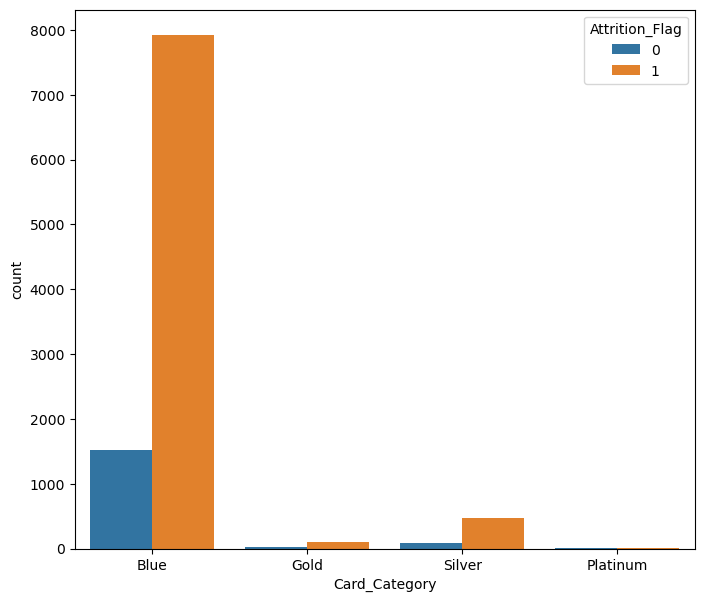

In [26]:
# Acuma vom distribui fiecare variabila categorica pe un grafic in raport cu variabila targer

for col in categorical_variables:
    fig,ax=plt.subplots(figsize=(8,7))
    ax=sns.countplot(data=data,x=col,hue='Attrition_Flag')
    plt.show()

Interpretare: Conform analizei datelor si graficelor realizate pana acuma, majoritatea clientilor, indiferent de ce statut il confera variabila 'Attrition_Flag', au un card de tip 'Blue'. Un numar redus de clienti au cardul 'Silver' si procente mici detin cadrui 'Gold' sau 'Platinum'. Vedem, de asemenea, ca majoritatea clientilor sunt casatoriti, un procent mare din acestia sunt celibatari si un numar mic din ei sunt divortati. Exista si o diferenta in cadrul sexului, chiar daca nu este una majora, existand mai multi clienti de sex feminin decat de sex masculin. Cei mai multi clienti au absolvit liceul, iar pe locul doi se afla cei care doar l-au terminat. Pe locul trei ca si numar de clienti se afla persoanele cu un nivel scazut spre inexistent de educatie. Numarul de clienti care au terminat ciclul de licenta este si mai sczut, iar cei care au absolvit un master sau un doctorat sun intr-un numar relevant, chiar daca acesta este redus. Cei mai multi clienti au venituri mai mici de 40 mii de dolari sau venituri situate in 40 si 60 de mii de dolari. Numarul de clienti scade atunci cand ei au venitrui situate intr 60 si 80 de mii de dolari, insa acest numar creste atunci cand intram in categoria 80-120 de mii de dolari. Cei mai putini clienti sunt cei care au venituri de peste 120 de mii de dolari. 

b) Acuma ca ai reusit sa identifici fiecare variabila categorica in parte si le-ai pus in grafic pentru observatii, e timpul sa te ocupi de valori necompletate in cadrul variabilelor categorice

In [27]:
data[categorical_variables].isnull().sum()
#dupa cum putem observa la 1519 clienti nu stim nivelul de educatie/studii, la 749 nu stim starea civila si la 2 persoane 
# nu cunoastem nivelul venitului pe care il produc

Gender                0
Education_Level    1519
Marital_Status      749
Income_Category       2
Card_Category         0
dtype: int64

<Axes: >

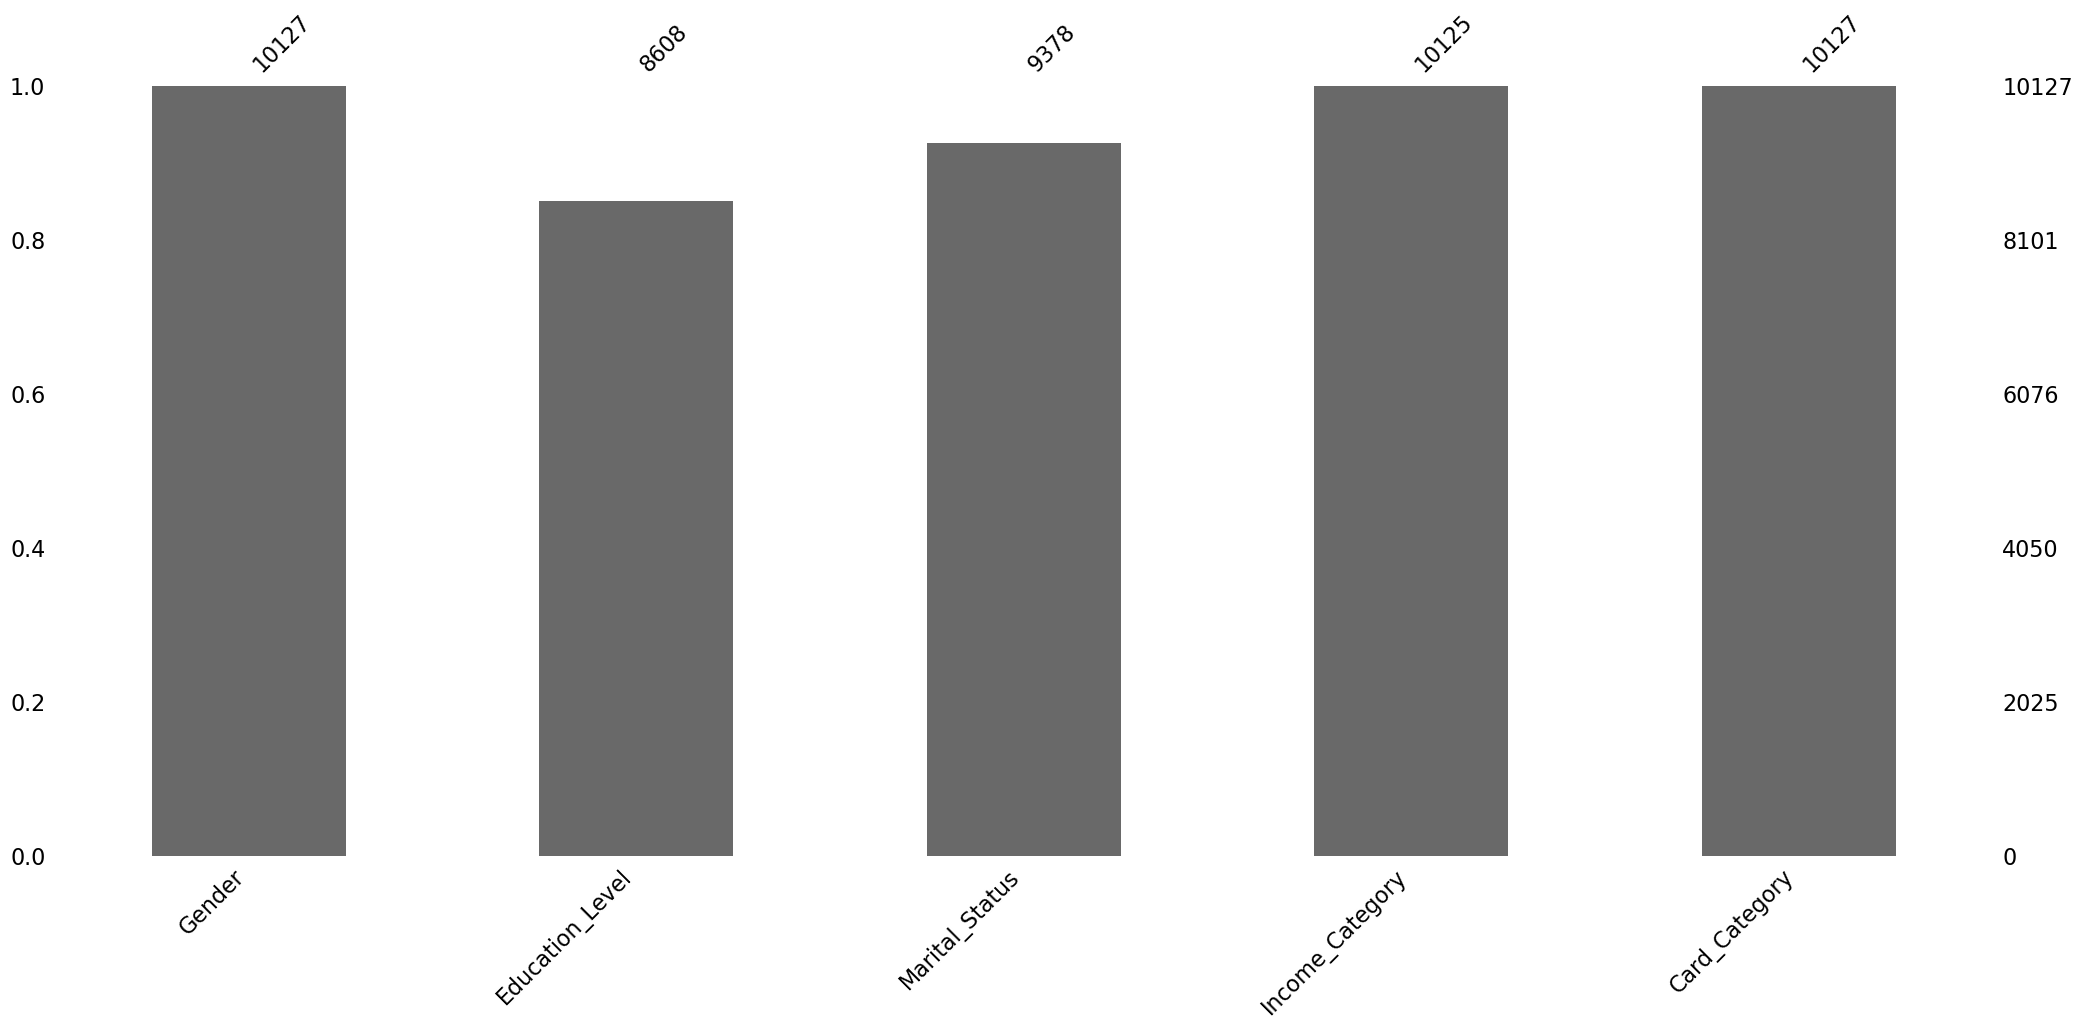

In [28]:
#Vom vizualiza valorile lipsa intr-un grafic
mso.bar(data[categorical_variables])

In acest grafic care contine doar variabilele categorice, putem observa ca in Education_Level avem 1529 de valori necompletate. In Income_Category lipsesc 2 valori, iar in Marital_Status lipsesc 749 de valori. 

In [29]:
data[categorical_variables].value_counts()

Gender  Education_Level  Marital_Status  Income_Category  Card_Category
F       Graduate         Married         Less than $40K   Blue             467
                         Single          Less than $40K   Blue             382
        High School      Married         Less than $40K   Blue             280
                         Single          Less than $40K   Blue             228
M       Graduate         Married         $80K - $120K     Blue             221
                                                                          ... 
F       Post-Graduate    Married         $40K - $60K      Silver             1
                         Single          $40K - $60K      Silver             1
                                         Less than $40K   Silver             1
                                         abc              Gold               1
M       Post-Graduate    Divorced        $40K - $60K      Blue               1
Length: 317, dtype: int64

In [30]:
#vom completa spatiile goale cu tipul necunoscut
data['Education_Level']=data['Education_Level'].fillna('Unknown')
data['Marital_Status']=data['Marital_Status'].fillna('Unknown')
data['Income_Category']=data['Income_Category'].fillna('Unknown')

In [31]:
data[categorical_variables].isnull().sum()

Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64

c) Vedem variatia atributelor/variabilelor categorice

In [32]:
data[categorical_variables].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    7
Card_Category      4
dtype: int64

Observam ca avem numai variabile care pot prelua valori diferite, nu este nevoie sa facem modificari in categorical_variables.

d) Convertirea tuturor variabilelor

In [33]:
data['Income_Category'].value_counts()/len(data)*100

Less than $40K    35.153550
$40K - $60K       17.665646
$80K - $120K      15.157500
$60K - $80K       13.844179
abc               10.980547
$120K +            7.178829
Unknown            0.019749
Name: Income_Category, dtype: float64

In [34]:
data['Card_Category'].value_counts()/len(data)*100

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

In [35]:
data['Education_Level'].value_counts()/len(data)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [36]:
data['Marital_Status'].value_counts()/len(data)*100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

Vedem ca in cazul coloanei Income_Category avem aceasta ramura de venit abc, care nu ne serveste si pe care o putem pune
undeva impreuna cu unknown.

Facem encode si introducem in Unknown

In [37]:
data['Income_Category']=np.where(data['Income_Category']=='abc','Unknown',data['Income_Category'])

In [38]:
data['Income_Category'].value_counts()/len(data)*100

Less than $40K    35.153550
$40K - $60K       17.665646
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           11.000296
$120K +            7.178829
Name: Income_Category, dtype: float64

### Variabilele numerice

In [39]:
numerical_columns=[col for col in data.columns if data[col].dtypes!='object']

In [40]:
data[numerical_columns].isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                3
Dependent_count             5
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<Axes: >

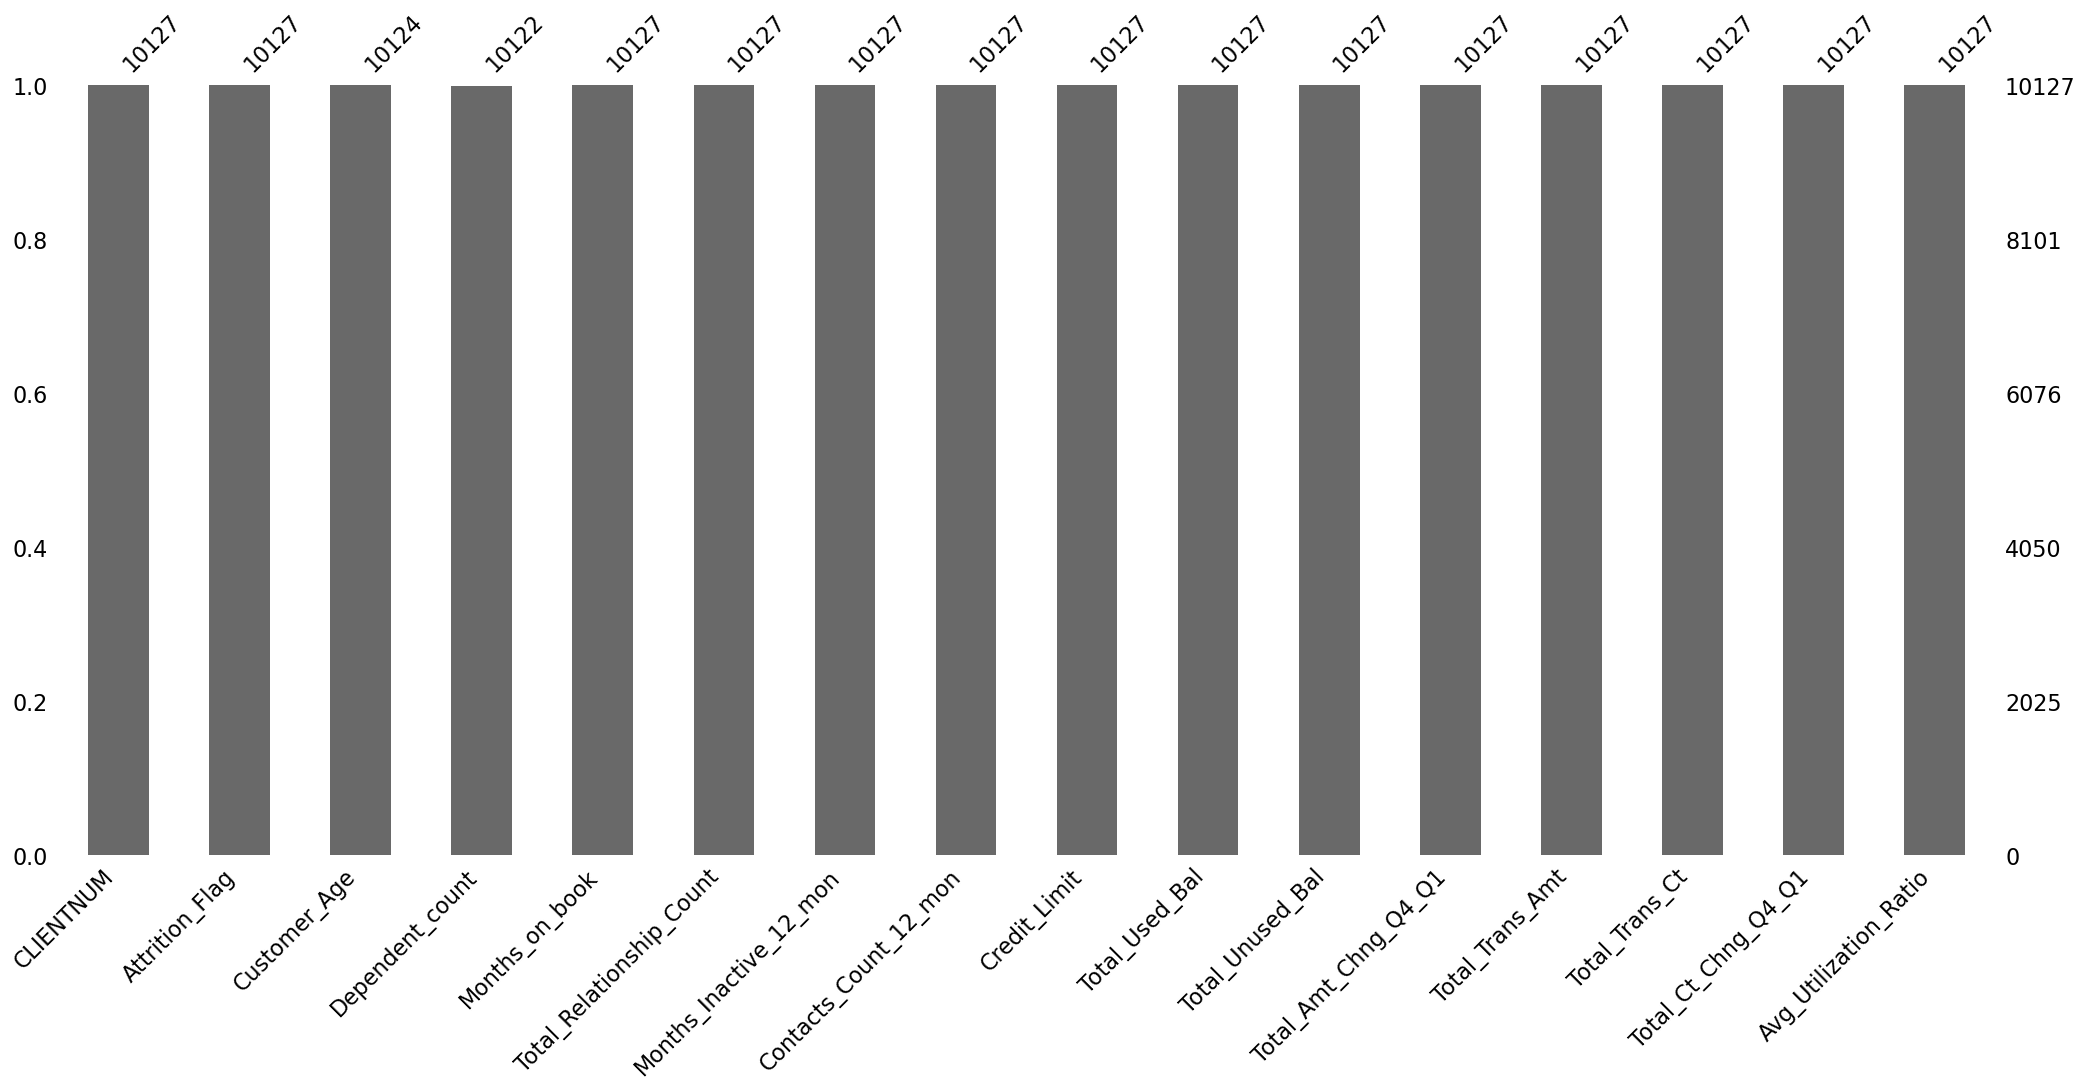

In [41]:
mso.bar(data[numerical_columns])

Asadar, din analiza, precum si de grafic putem remarca urmatorul aspect: lipsesc 5 valori din Dependent_count si 3 valori din Customer_Age.

In [42]:
# Se pare ca lipsesc 5 valori din Dependent_count si 3 valori din Customer_Age
data['Dependent_count']

0        3.0
1        5.0
2        3.0
3        4.0
4        3.0
        ... 
10122    2.0
10123    2.0
10124    1.0
10125    2.0
10126    2.0
Name: Dependent_count, Length: 10127, dtype: float64

In [43]:
data['Dependent_count']=data['Dependent_count'].fillna(data['Dependent_count'].min())


In [44]:
data['Customer_Age']

0        45.0
1        49.0
2        51.0
3        40.0
4        40.0
         ... 
10122    50.0
10123    41.0
10124    44.0
10125    30.0
10126    43.0
Name: Customer_Age, Length: 10127, dtype: float64

In [45]:
data['Customer_Age']=data['Customer_Age'].fillna(data['Customer_Age'].mean())

In [46]:
data['Dependent_count'].isnull().sum()
data['Customer_Age'].isnull().sum()
#nu mai avem valori nule in nicio coloana numerica

0

b) Cautam din nou, daca avem variabile care sunt obligatorii unice, pe acestea le vom elimina.

In [47]:
data[numerical_columns].nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   46
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Unused_Bal             6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Din nou, nu avem astfel de valori, asadar compozitia tabelului final nu se va modifica in acest sens.

In [48]:
data['Credit_Limit'].value_counts()/len(data)*100

34516.0    5.016293
1438.3     5.006418
9959.0     0.177743
15987.0    0.177743
23981.0    0.118495
             ...   
9183.0     0.009875
29923.0    0.009875
9551.0     0.009875
11558.0    0.009875
10388.0    0.009875
Name: Credit_Limit, Length: 6205, dtype: float64

c) Cautam valorile extreme(outlier).

In [49]:
q1=data['Credit_Limit'].quantile(0.25)
q3=data['Credit_Limit'].quantile(0.75)
IQR=q3-q1;
lower_limit=IQR-3*q1
upper_limit=IQR+3*q3

In [50]:
data[(data['Credit_Limit']<lower_limit)|(data['Credit_Limit']>upper_limit)]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


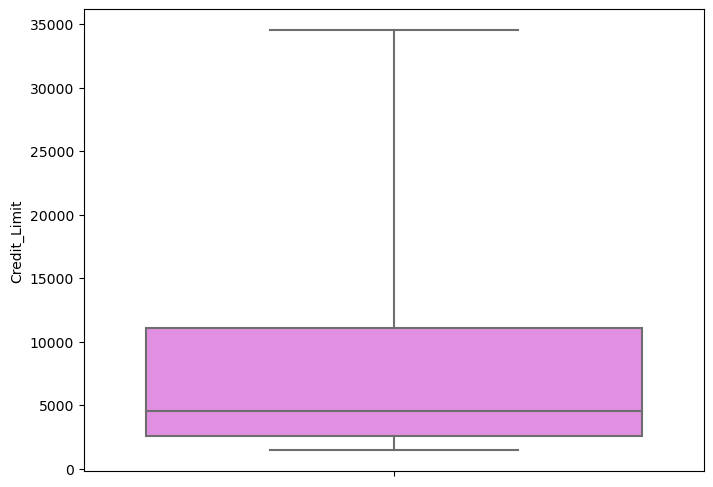

In [51]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(y=data['Credit_Limit'],color='violet',whis=3)
plt.show()

Aici nu avem valori outlier, trebuie sa cautam in celelalte variabile.

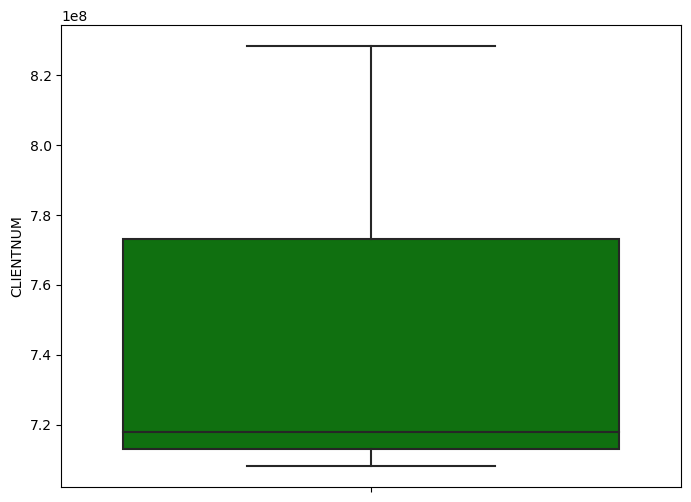

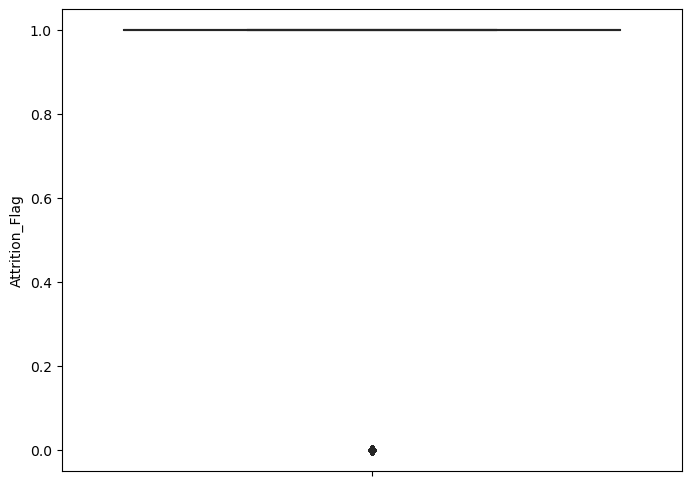

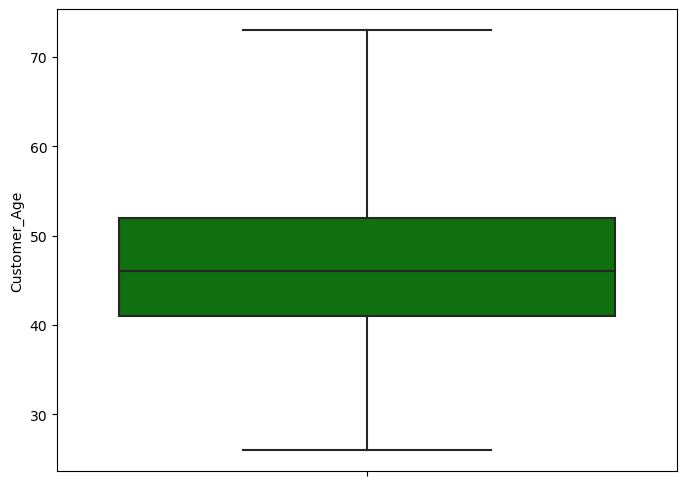

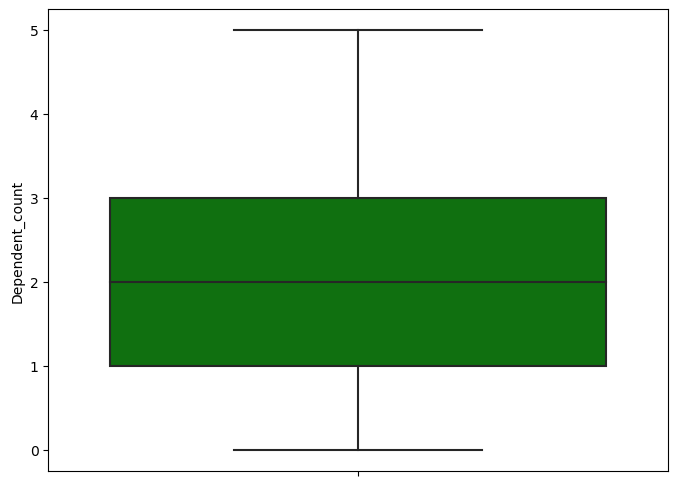

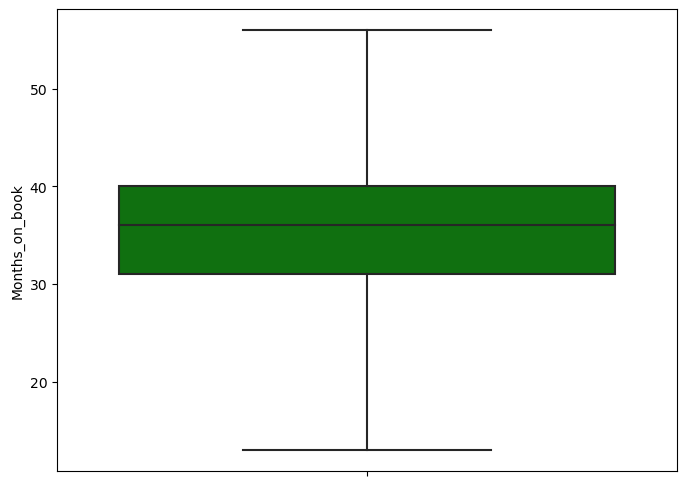

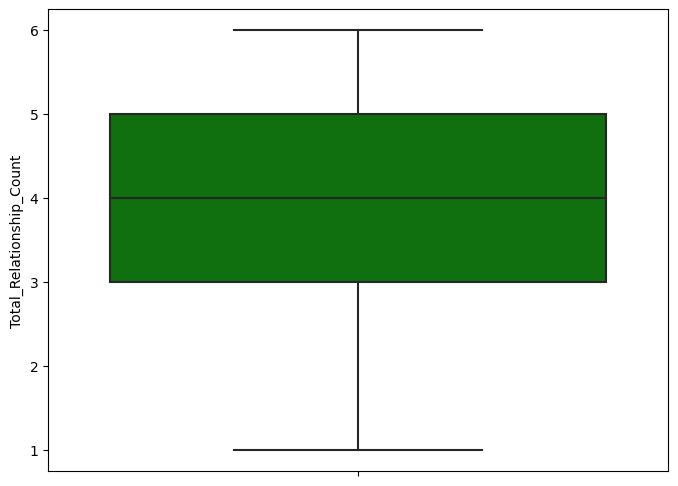

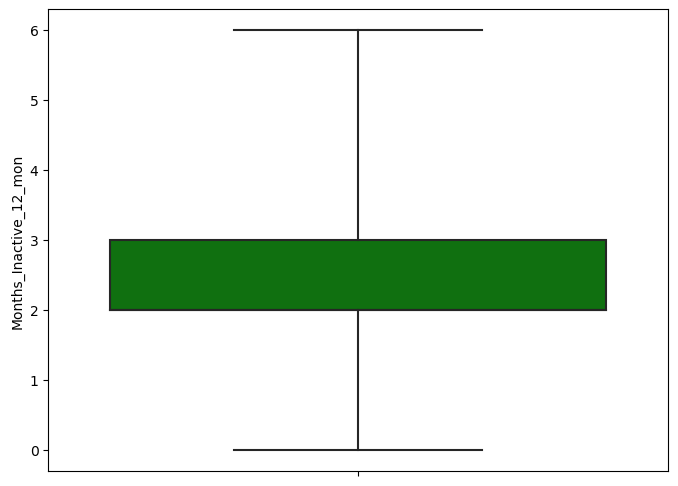

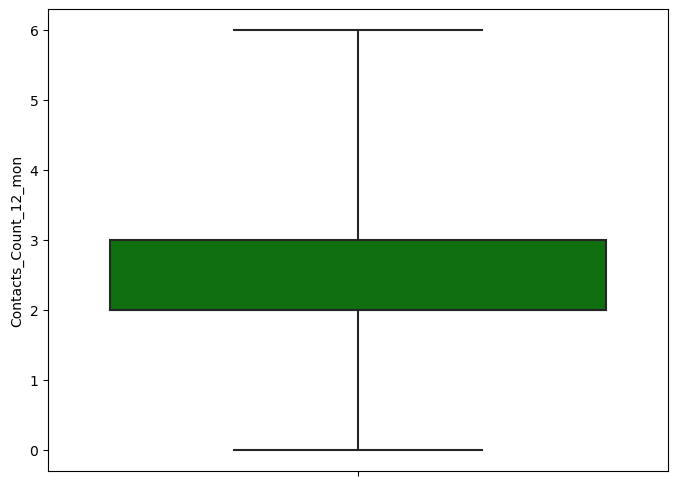

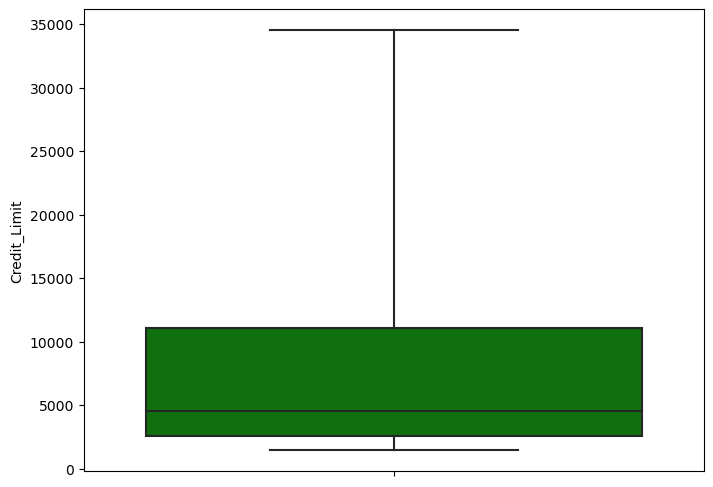

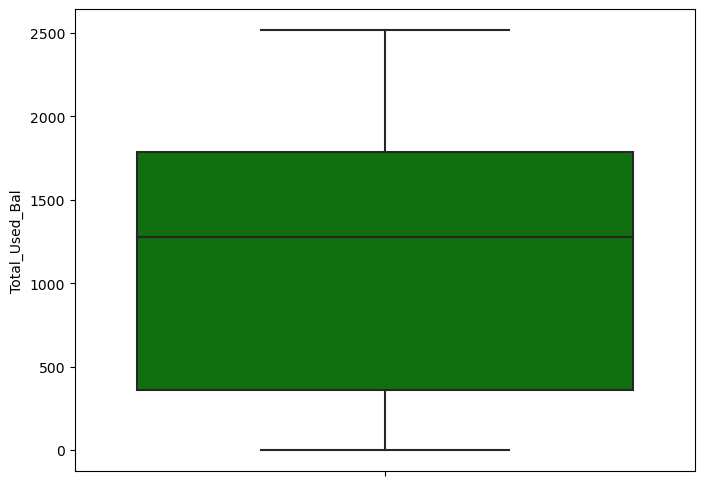

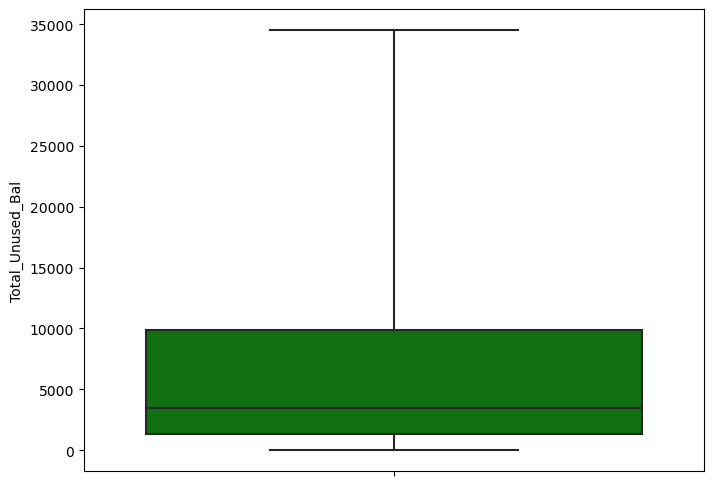

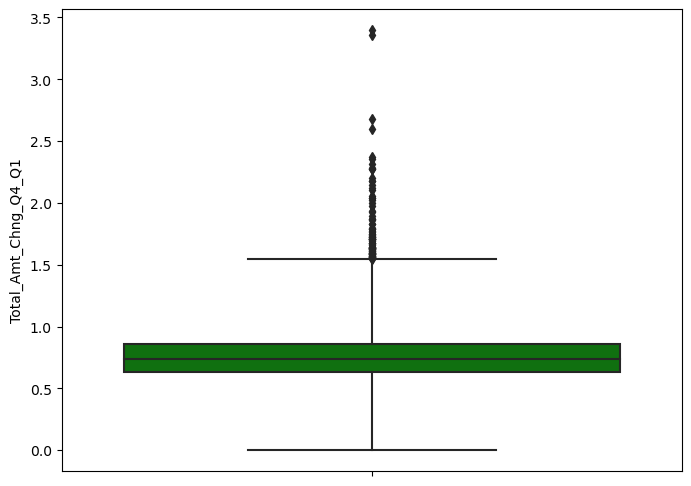

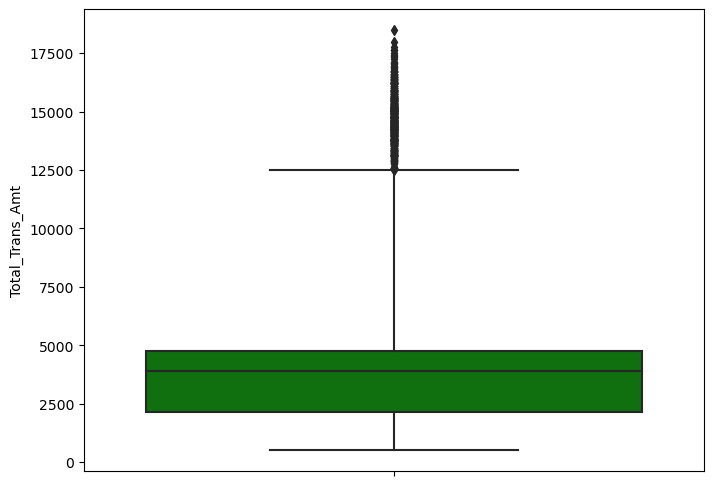

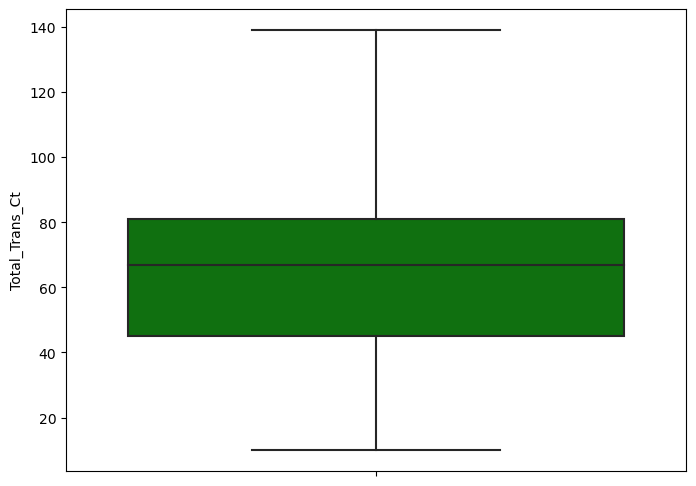

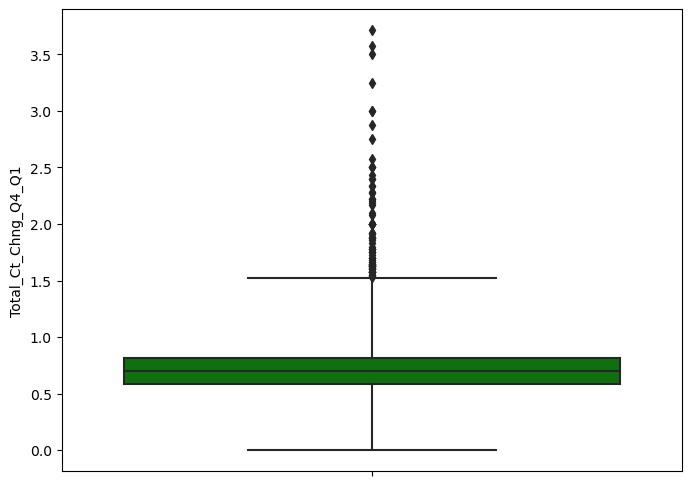

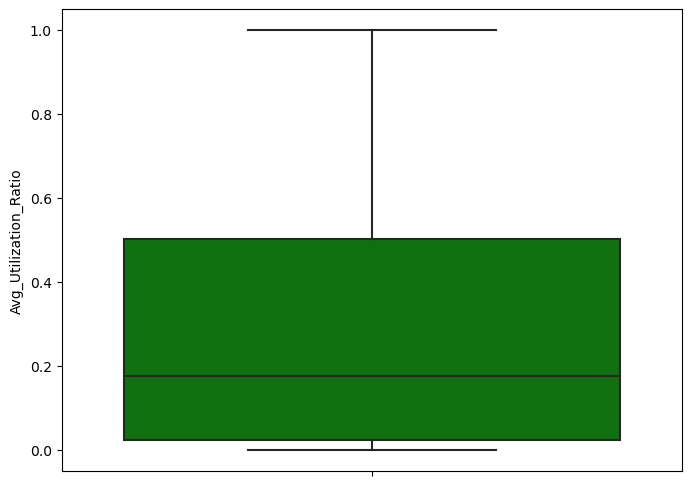

In [52]:
for col in numerical_columns:
    fig,ax=plt.subplots(figsize=(8,6))
    sns.boxplot(y=data[col],color='green',whis=3)
    plt.show()

Vedem ca avem urmatoarele variabile afectate de outlieri: Total_Ct_Chng_Q4_Q1, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1,Attrition_Flag.
Vom inlocuri valorile outlier cu limita inferioara atunci cand acestea sunt mai mici decat limita sau cu limmita_maxima, daca valorile sunt mai mare deccat aceasta.

In [154]:
affected_by_outliers=['Total_Ct_Chng_Q4_Q1','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Attrition_Flag']

In [155]:
def censoring_outliers(dataframe,column):
    q1=dataframe[column].quantile(0.25)
    q3=dataframe[column].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-3*IQR
    upper_limit=q3+3*IQR
    dataframe[column]=np.where(dataframe[column]<lower_limit,lower_limit,np.where(dataframe[column]>upper_limit,upper_limit,dataframe[column]))

In [156]:
for variable in affected_by_outliers:
    censoring_outliers(data,variable)

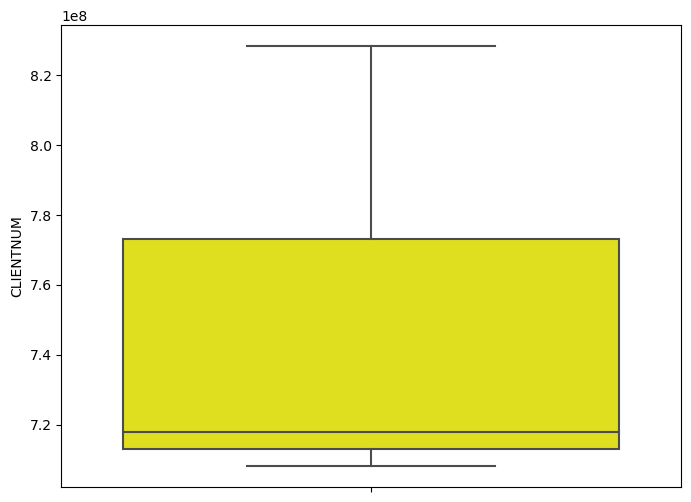

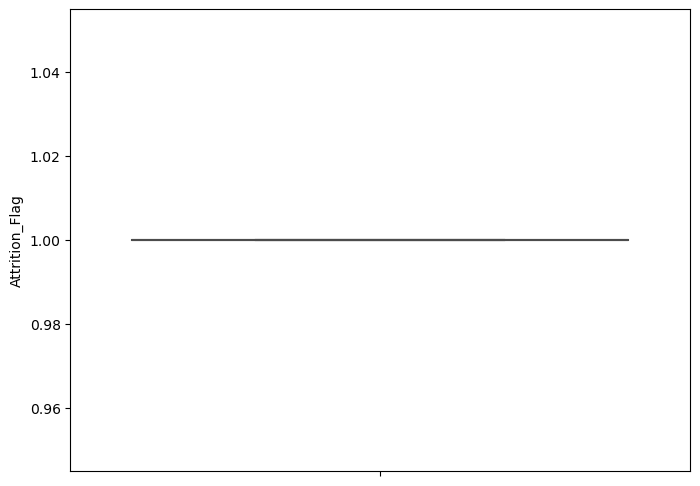

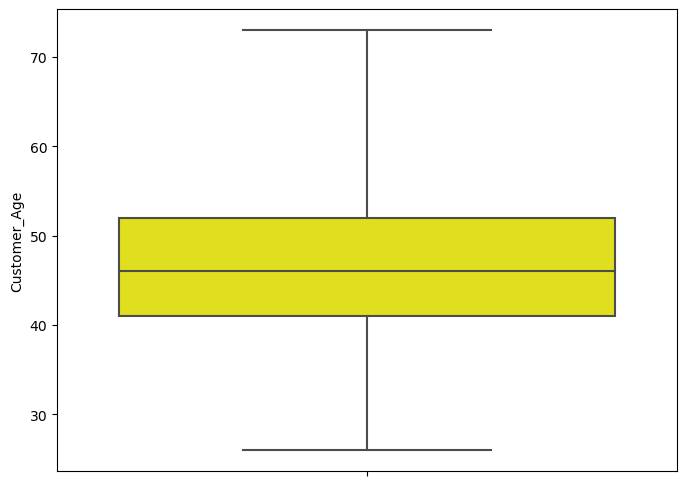

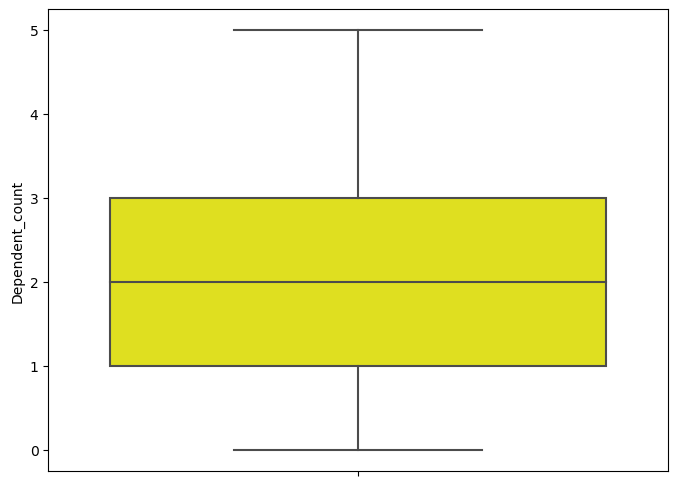

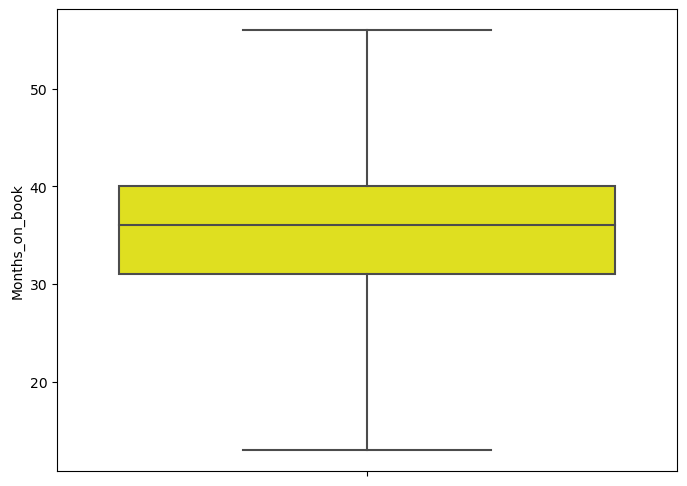

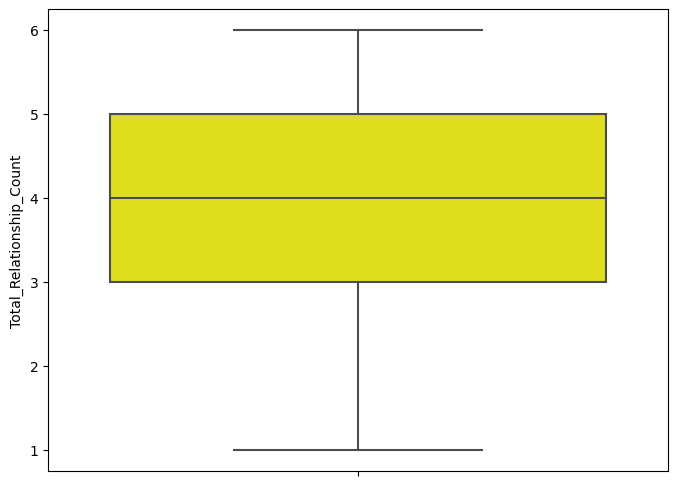

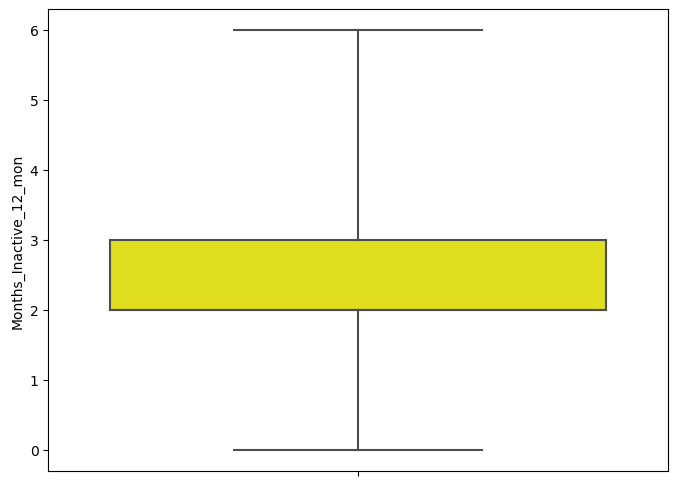

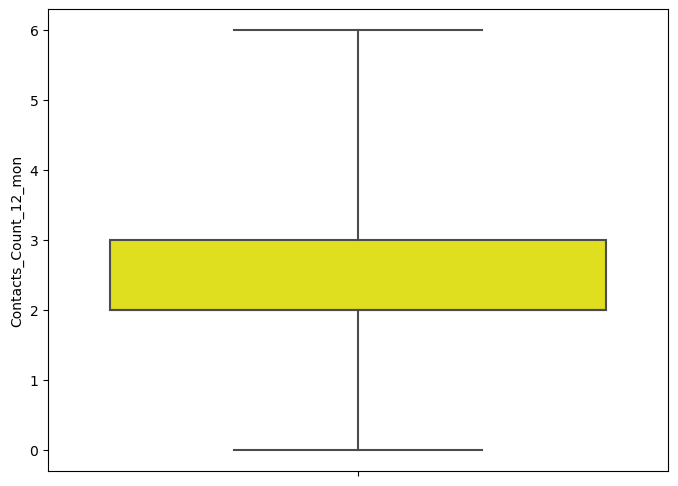

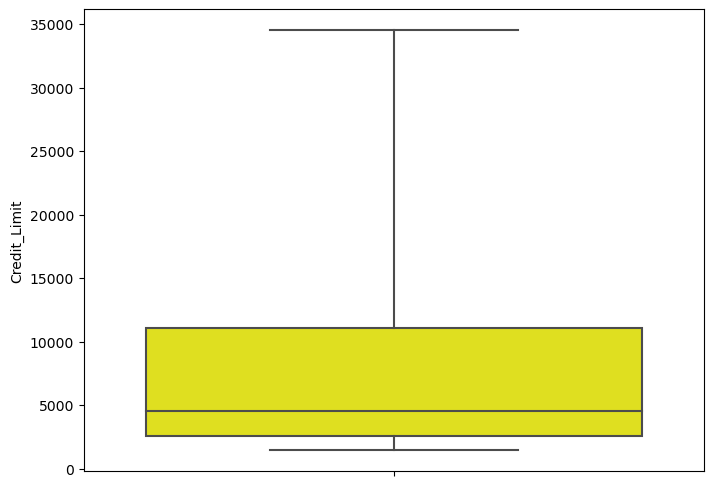

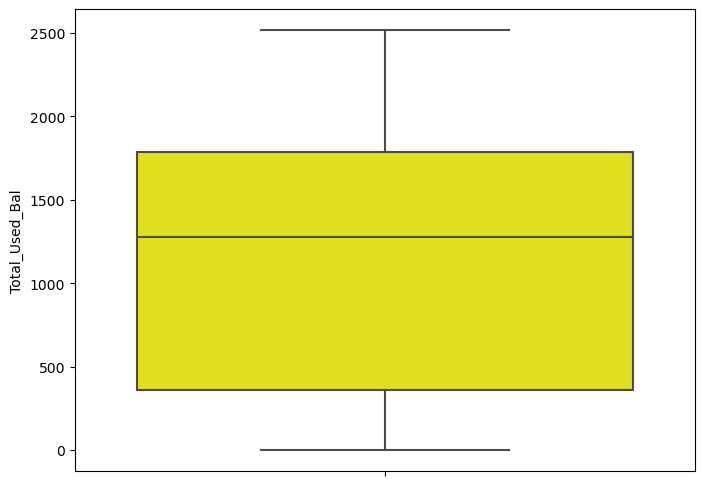

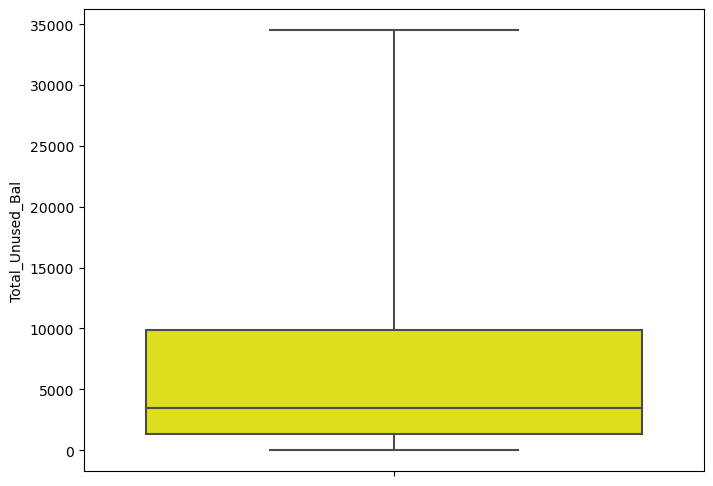

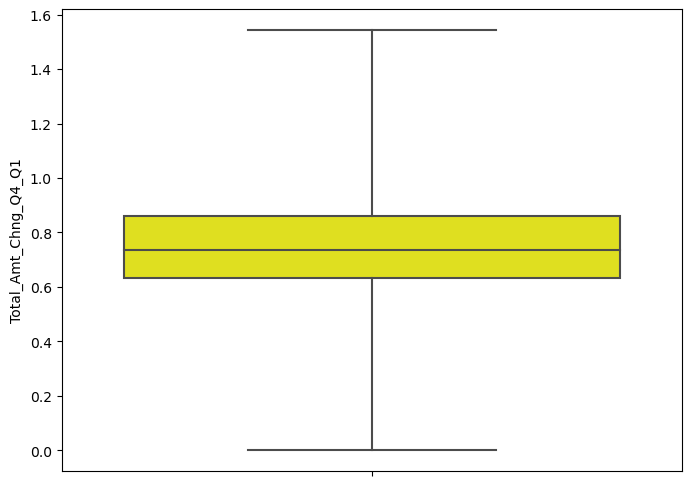

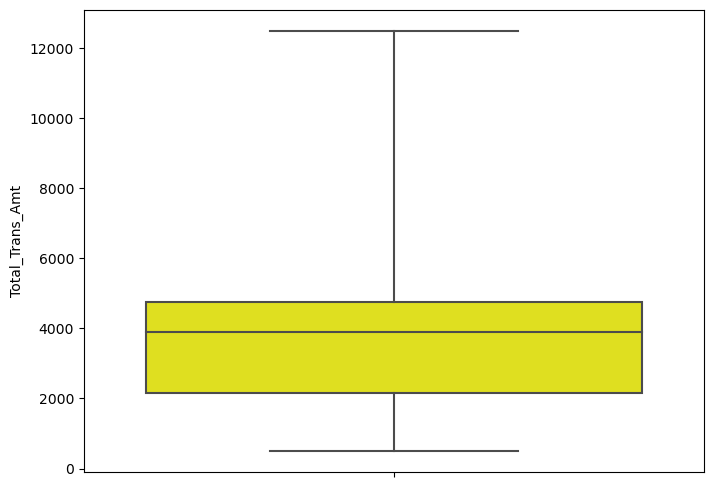

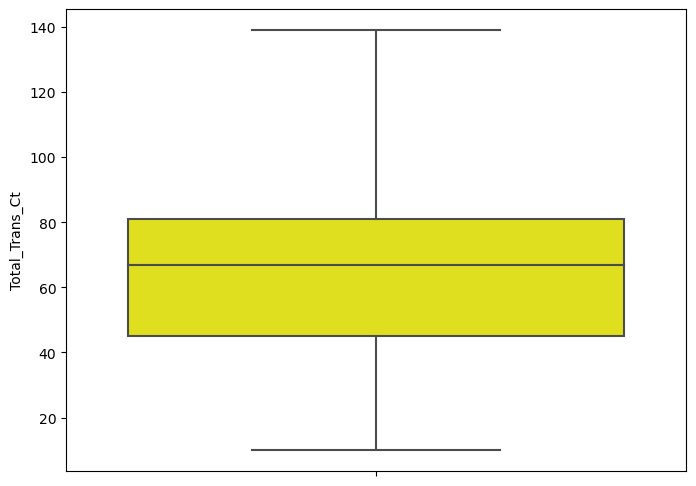

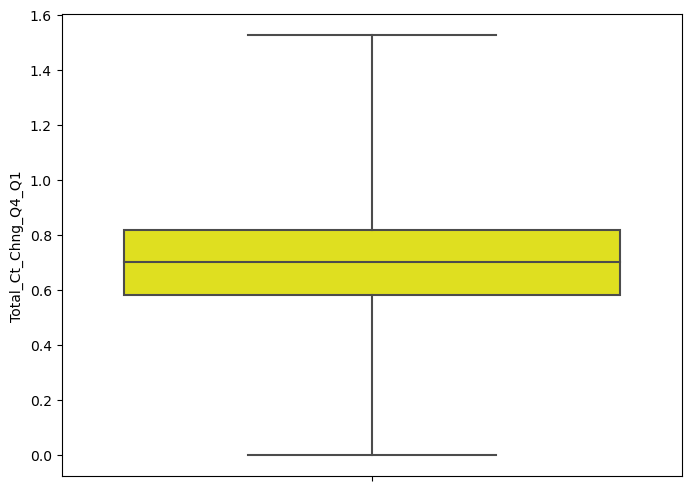

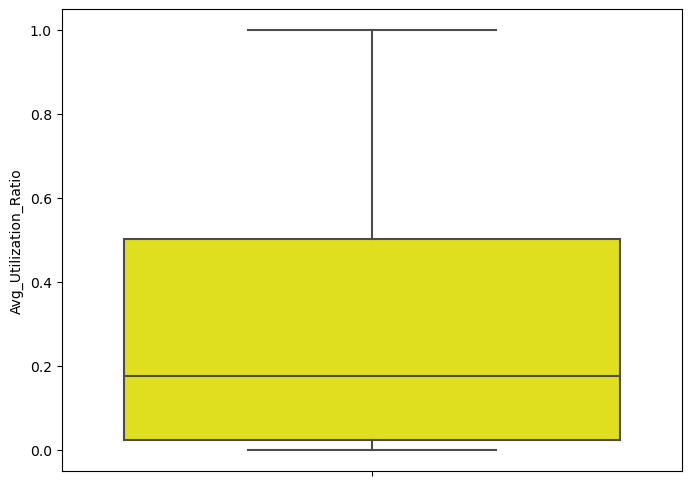

In [157]:
for col in numerical_columns:
    fig,ax=plt.subplots(figsize=(8,6))
    sns.boxplot(y=data[col],color='yellow',whis=3)
    plt.show()

d) Vedem corelatia.

In [57]:
correlation=data[numerical_columns].corr()

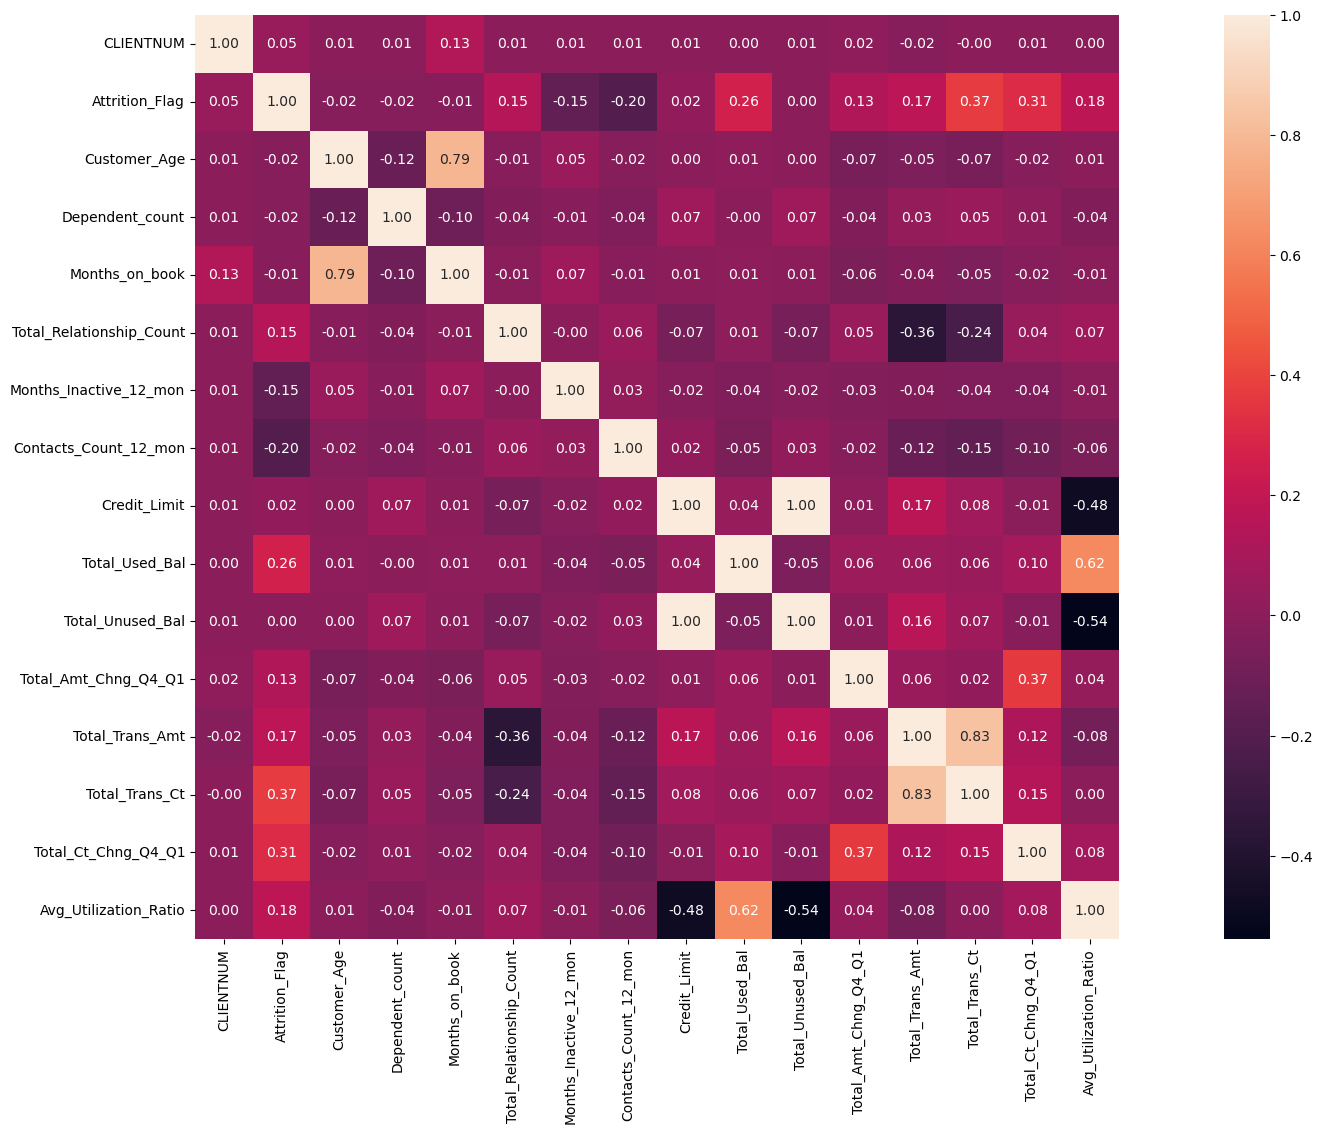

In [58]:
fig,ax=plt.subplots(figsize=(27,12))
sns.heatmap(correlation,annot=True,square=True,fmt='.2f')
plt.show()

Interpretari: Putem observa ca o corelatie pozitiva puternica intre Months_On_Book si Customer_Age de 0,79.
La fel exista o corelatia puternica de 0,83 intre Total_Trans_Ct si Total_Trans_Amt.
Mai exista o corelatia medie pozitiva intre Total_Used_Bal si Avg_Utilization_Ratio de 0.62.
Avem corelatie slaba pozitiva de 0,37 intre Total_Trans_Ct si Attrition_Flag, respectiv intre Total_Ct_Chng_Q4_Q1 si Total_Amt_Chng_Q4_Q1.
Exista o corelatie slaba de 0,31 intre Total_Ct_Chng_Q4_Q1 si  Attrition_Flag.
Avem corelatia slaba negativa de -0,36 intre Total_Trans_Amt si Total_Relatioship_Count.
De asemenea, exista o corelatie negativa slaba de -0,48 intre Credit_Limit si Avg_Utilization_Ratio.
Se poate observa si o corelatie negativa medie de -0,54 intre Avg_Utilization_Ratio si Total_Unused_Bal.
Restul corelatiilor au un impact scazut, deci o relevanta mult mai mica.

# D. Se pregatesc testele

## I. Variabila independenta si variabila target

In [59]:
y=data['Attrition_Flag']
X=data.drop(columns='Attrition_Flag')

In [60]:
X.shape,y.shape

((10127, 20), (10127,))

## II. Preprocesam datele

a) Cautam toate variabilele de tip object.

In [61]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [65]:
#Vedem continutul acelor coloane cu date de tip object
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [66]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [67]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [68]:
data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [69]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

b) Eliminam informatiile cu o relevanta scazuta pentru a imbunatati performanta.

In [70]:
#pentru modelul nostru cea mai mica relevanta sunt tipul cardului, deoarece ele nu au un impact mare
#in a prevede care client va parasi sistemul bancar
X=X.drop(columns=['Gender','Card_Category'])

In [71]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,3.0,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144.0,42,1.526,0.061
1,818770008,49.0,5.0,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291.0,33,1.526,0.105
2,713982108,51.0,3.0,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,1.543,1887.0,20,1.526,0.000
3,769911858,40.0,4.0,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171.0,20,1.526,0.760
4,709106358,40.0,3.0,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,1.543,816.0,28,1.526,0.000


c) Pregatim modelele.

In [73]:
categorical_columns=[col for col in X.columns if X[col].dtypes=='object']

In [74]:
categorical_columns

['Education_Level', 'Marital_Status', 'Income_Category']

In [75]:
X=pd.get_dummies(X,columns=categorical_columns)

In [76]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,45.0,3.0,39,5,1,3,12691.0,777,11914.0,...,0,1,0,0,0,0,1,0,0,0
1,818770008,49.0,5.0,44,6,1,2,8256.0,864,7392.0,...,0,0,1,0,0,0,0,0,1,0
2,713982108,51.0,3.0,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,0,0,1,0,0
3,769911858,40.0,4.0,34,3,4,1,3313.0,2517,796.0,...,0,0,0,1,0,0,0,0,1,0
4,709106358,40.0,3.0,21,5,1,0,4716.0,0,4716.0,...,0,1,0,0,0,0,1,0,0,0


## III. Pregatim seturile de antrenare si testare

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [78]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8101, 32), (2026, 32), (8101,), (2026,))

### Algoritmul Random Forest Classifier

In [79]:
rf=RandomForestClassifier(n_estimators=300,max_depth=5,n_jobs=-1,random_state=123)

In [80]:
#Acum ca l-am initializat, trebuie sa il punem in aplicare
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1,
                       random_state=123)

### Incercam sa prezicem rezultatele

In [81]:
y_predict=rf.predict(X_test)

In [82]:
y_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Vedem criteriile de performanta

a) Acuratetea

In [83]:
accuracy=accuracy_score(y_test,y_predict)

In [85]:
print('Pentru algoritmul Random Forest Classifier, avem o acuratete de:',accuracy)

Pentru algoritmul Random Forest Classifier, avem o acuratete de: 0.920533070088845


b) Cautam valorile cu adevarat pozitive si negative si pe cele fals pozitive si negative cu matricea de confuzie.

In [86]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 171  150]
 [  11 1694]]


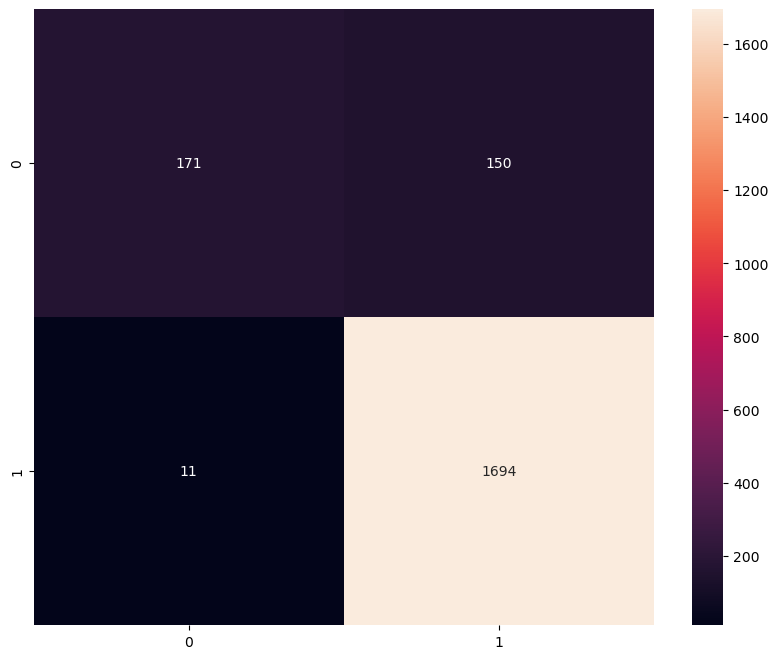

In [87]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

Interpretare: Cu ajutorul analizei si al graficului dat, putem vedea ca avem 1694  de valori cu adevarat pozitive, 171 de valori cu adevarat negative, 11 de valori fals negative si 150 valori fals pozitive. Acuratetea este de 92%, precizia de 91,8%, sensibilitate de 99,3% si scorul AUC de 76,3%.

c) Cautam precizia si sensibilitatea

In [88]:
precision=precision_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
print('Precision score:',precision)
print('Recall score:',recall)

Precision score: 0.9186550976138829
Recall score: 0.9935483870967742


d) Verificam daca avem overfitting

In [90]:
y_train_predict=rf.predict(X_train)

In [91]:
precision=precision_score(y_train,y_train_predict)
recall=recall_score(y_train,y_train_predict)
print('Precision score:',precision)
print('Recall score:',recall)

Precision score: 0.9142003801248981
Recall score: 0.9910228108903606


Interpretare: Valorile pentru precizie si sensibilitate se modifica marginal. precizia scade cu aproximativ 0,004, iar sensibilitatea scade cu aproximativ 0,002, deci nu se poate vorbi de un overfitting care sa fie important

d) scorul AUC

In [92]:
auc_score=roc_auc_score(y_test,y_predict)
print('AUC score is:',auc_score)

AUC score is: 0.763129333735303


f) Verificam daca avem overfitting

In [107]:
y_predict_train=rf.predict(X_train)
auc_score=roc_auc_score(y_train,y_predict_train)
print('AUC score is:',auc_score)

AUC score is: 0.7535512216779522


Interpretare: Diferenta intre test si antrenare e prea mica ca sa avem un overfitting care sa conteze.

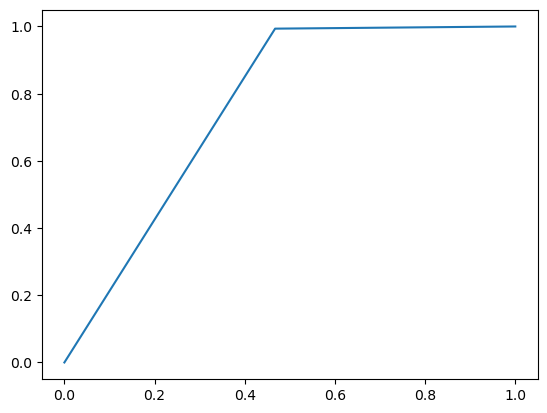

In [93]:
fpr,tpr,treshold=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)

Interpretare: Acesta este un grafic prin care se arata curba ROC. Vedem ca din 0.0 pana la 0.5 acesta curba creste sub o forma de functie f(x)=2*x, iar din 0.5 pana la 1, valoarea curbei ramane constanta la 1.

### Algoritmul XGBoost (eXtreme Gradient Boosting)

In [94]:
xgb=XGBClassifier(n_estimators=250,max_depth=4,n_jobs=-1,random_state=100)

In [95]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

### Incercam sa prezicem rezultatele

In [96]:
y_predict=xgb.predict(X_test)
y_predict

array([1, 1, 1, ..., 0, 1, 1])

### Analizam criteriile de performanta

a) acuratetea

In [98]:
accuracy=accuracy_score(y_test,y_predict)
print('Accuracy for XGBoost is:',accuracy)

Accuracy for XGBoost is: 0.9693978282329714


b) Cream matricea de confuzie, pentru a vedea rezultatele adevarate si rezultatele false

In [99]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 280   41]
 [  21 1684]]


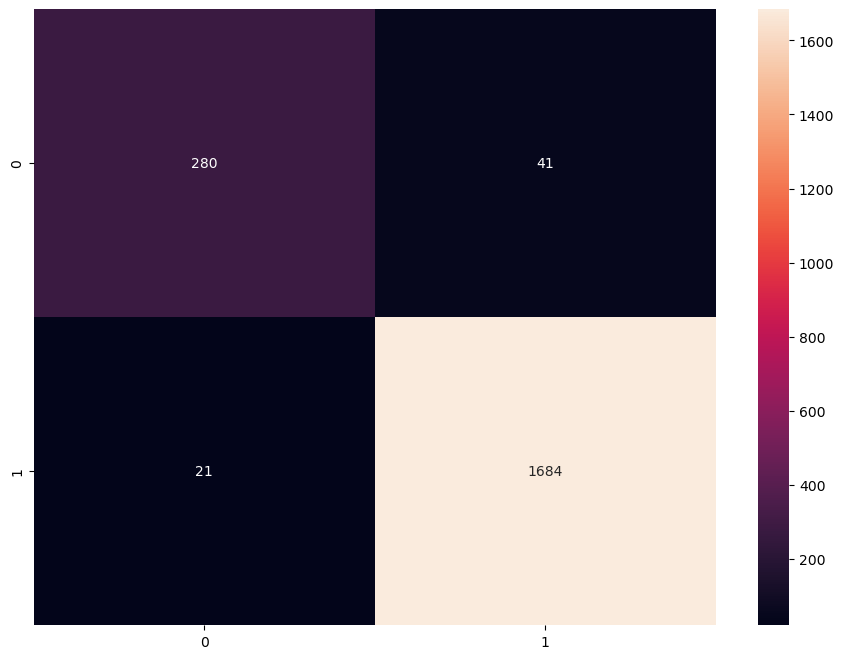

In [100]:
fig,ax=plt.subplots(figsize=(11,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

Interpretare:Interpretare: Cu ajutorul analizei si al graficului dat, putem vedea ca avem 1684  de valori cu adevarat pozitive, 280 de valori cu adevarat negative, 21 de valori fals negative si 41 valori fals pozitive. Acuratetea este de 96,9%, precizia de 97,6%, sensibilitate de 98,7% si scorul AUC de 92,9%.

c) Cautam sensibilitatea si precizia.

In [101]:
precision=precision_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
print('Precision score:',precision)
print('Recall score:',recall)

Precision score: 0.976231884057971
Recall score: 0.987683284457478


d) Verificam daca avem overfitting.

In [102]:
y_train_predict=rf.predict(X_train)
precision=precision_score(y_train,y_train_predict)
recall=recall_score(y_train,y_train_predict)
print('Precision score:',precision)
print('Recall score:',recall)

Precision score: 0.9142003801248981
Recall score: 0.9910228108903606


Interpretare: Scorul de sensibilitate se modifica doar cu aproximativ 0,035, deci nu putem vorbi de un overfitting sau underfitting relevant. Scorul de precizie insa scade cu peste 0,6, ceea ce indica ca exista un underfitting destul de important

e) Scorul AUC.

In [103]:
auc_score=roc_auc_score(y_test,y_predict)
print('AUC score',auc_score)

AUC score 0.9299787138798294


f) Verificam daca avem overfitting.

In [105]:
y_predict_train=xgb.predict(X_train)
auc_score=roc_auc_score(y_train,y_predict_train)
print('AUC score is:',auc_score)

AUC score is: 1.0


Interpretare: Se pare ca in cazul scorului AUC avem overfitting, diferenta dintre rezultatul de la antrenare si cel de la test fiind de aproximativ 0,7, scorul AUC de la antrenare ajungand sa abia valoarea 1. 

### Prelucram hipervalorile

a) Declaram posibile hipervalori pentru algoritmul XGBoost.

In [109]:
n_estimators=[150,250]
max_depth=[3,4]
learning_rate=[0.1,0.05]

b) Cautam hipervalorile.

In [110]:
results=[]
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb=XGBClassifier(n_estimators=est,max_depth=md,learning_rate=lr, n_jobs=-1,random_state=100,subsample=0.7,colsample_bytree=0.5)
            xgb.fit(X_train,y_train)
            y_predict=xgb.predict(X_test)
            auc_score=roc_auc_score(y_test,y_predict)
            results.append(['estimators',est,'max_depth',md,'leraning_rate',lr,'auc',auc_score])

In [111]:
print(results)

[['estimators', 200, 'max_depth', 3, 'leraning_rate', 0.1, 'auc', 0.9262769388183918], ['estimators', 200, 'max_depth', 3, 'leraning_rate', 0.05, 'auc', 0.91498890015622], ['estimators', 200, 'max_depth', 4, 'leraning_rate', 0.1, 'auc', 0.930565224143759], ['estimators', 200, 'max_depth', 4, 'leraning_rate', 0.05, 'auc', 0.9138158796283607], ['estimators', 300, 'max_depth', 3, 'leraning_rate', 0.1, 'auc', 0.9268634490823215], ['estimators', 300, 'max_depth', 3, 'leraning_rate', 0.05, 'auc', 0.9146956450242553], ['estimators', 300, 'max_depth', 4, 'leraning_rate', 0.1, 'auc', 0.9284210814810755], ['estimators', 300, 'max_depth', 4, 'leraning_rate', 0.05, 'auc', 0.9196617973524817]]


In [113]:
results

[['estimators',
  200,
  'max_depth',
  3,
  'leraning_rate',
  0.1,
  'auc',
  0.9262769388183918],
 ['estimators',
  200,
  'max_depth',
  3,
  'leraning_rate',
  0.05,
  'auc',
  0.91498890015622],
 ['estimators',
  200,
  'max_depth',
  4,
  'leraning_rate',
  0.1,
  'auc',
  0.930565224143759],
 ['estimators',
  200,
  'max_depth',
  4,
  'leraning_rate',
  0.05,
  'auc',
  0.9138158796283607],
 ['estimators',
  300,
  'max_depth',
  3,
  'leraning_rate',
  0.1,
  'auc',
  0.9268634490823215],
 ['estimators',
  300,
  'max_depth',
  3,
  'leraning_rate',
  0.05,
  'auc',
  0.9146956450242553],
 ['estimators',
  300,
  'max_depth',
  4,
  'leraning_rate',
  0.1,
  'auc',
  0.9284210814810755],
 ['estimators',
  300,
  'max_depth',
  4,
  'leraning_rate',
  0.05,
  'auc',
  0.9196617973524817]]

Interpretare: Modelul cu parametrii n_estimators=200, max_depth=4, learning_rate=0.1 e cel mai bun.

Verificam pentru overfitting.

In [114]:
best_model=XGBClassifier(n_estimator=200,max_depth=4,rate=0.1,n_jobs=-1,subsample=0.6,solsample_bytree=0.5,random_state=123)
best_model.fit(X_train,y_train)
y_predict_train=best_model.predict(X_train)
y_predict_test=best_model.predict(X_test)
auc_score_train=roc_auc_score(y_train,y_predict_train)
auc_score_test=roc_auc_score(y_test,y_predict_test)
print('AUC train',auc_score_train)
print('AUC test',auc_score_test)

[14:24:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator", "rate", "solsample_bytree" } are not used.

AUC train 0.9941986214077326
AUC test 0.9175176546897982


Interpretare: Scorul AUC pentru antrenare este mai mare cu aproximativ 0,079, deci se poate vorbi despre overfitting.

## Salvam rezultatele intr-un fisier binar

In [115]:
import pickle
with open('C:\\Users\\Gucci\\Desktop\\TTJ project\\TTJ project\\final_model.pkl','wb') as file:
    pickle.dump(best_model,file)

# E. Continuam cu analiza indicatorilor lift si gain

Facem aceasta analiza pentru a vedea eficacitatea unui model predictiv.

In [117]:
y_predict_proba=xgb.predict_proba(X_test)
y_predict_proba

array([[3.4443736e-02, 9.6555626e-01],
       [3.8262010e-03, 9.9617380e-01],
       [2.5113821e-03, 9.9748862e-01],
       ...,
       [9.8464829e-01, 1.5351691e-02],
       [9.6988678e-04, 9.9903011e-01],
       [4.4490695e-02, 9.5550931e-01]], dtype=float32)

a) Calculam probabilitatile.

In [118]:
y_predict_proba_class_1=y_predict_proba[:,1]
y_predict_proba_class_1

array([0.96555626, 0.9961738 , 0.9974886 , ..., 0.01535169, 0.9990301 ,
       0.9555093 ], dtype=float32)

b) Scorul AUC

In [120]:
auc_score=roc_auc_score(y_test,y_predict_proba_class_1)

In [121]:
print(auc_score);

0.9931263189629183


In [136]:
# cream un DataFrame nou si gol
lift_gain_report=pd.DataFrame()

#il introducem le y_test in DataFrame
lift_gain_report['y_test']=y_test

#adaugam probabilitatile in DataFrame
lift_gain_report['Predicted Probabilities']=y_predict_proba_class_1

#ordonam probabilitatile descrescator
lift_gain_report['Probabilities Rank']=lift_gain_report['Predicted Probabilities'].rank(method='first',ascending=False,pct=True)

#calculam o coloana decile pentru a face separarea observatiilor
lift_gain_report['Decil group']=np.floor((1- lift_gain_report['Probabilities Rank'])*10)+1

#grupam observatiile
lift_gain_report['No of observations']=1
lift_gain_report=lift_gain_report.groupby(['Decil group']).sum().reset_index()

#introducem numarul cumulativ de observatii
lift_gain_report['Cumulative no of observations']=lift_gain_report['No of observations'].cumsum()

#procentul cumulativ
lift_gain_report['Cumulative % of observations']=lift_gain_report['Cumulative no of observations']/lift_gain_report['Cumulative no of observations'].max()

#calculam cumulativele pozitive
lift_gain_report['Cumulative no of positives']=lift_gain_report['y_test'].cumsum()

#calculam cumulativele pozitive(Gain)
lift_gain_report['Gain']=lift_gain_report['Cumulative no of positives']/lift_gain_report['Cumulative no of positives'].max()

#Calculam valorile Lift
lift_gain_report['Lift']=lift_gain_report['Gain']/lift_gain_report['Cumulative % of observations']

lift_gain_report

,Decil group,y_test,Predicted Probabilities,Probabilities Rank,No of observations,Cumulative no of observations,Cumulative % of observations,Cumulative no of positives,Gain,Lift
0,1.0,3,6.797051,192.880059,203,203,0.100197,3,0.001760,0.017561
1,2.0,93,107.519356,172.539980,203,406,0.200395,96,0.056305,0.280970
2,3.0,191,188.822098,151.500000,202,608,0.300099,287,0.168328,0.560910
3,4.0,203,199.250183,131.960020,203,811,0.400296,490,0.287390,0.717944
4,5.0,202,200.446136,111.119941,202,1013,0.500000,692,0.405865,0.811730
5,6.0,203,202.192703,91.380059,203,1216,0.600197,895,0.524927,0.874590
6,7.0,203,202.560715,71.039980,203,1419,0.700395,1098,0.643988,0.919465
7,8.0,202,201.749695,50.500000,202,1621,0.800099,1300,0.762463,0.952962
8,9.0,203,202.841263,30.460020,203,1824,0.900296,1503,0.881525,0.979150
9,10.0,202,201.917343,10.119941,202,2026,1.000000,1705,1.000000,1.000000


## Cream graficele pentru Gain si Lift

a) Graifcul pentru Lift

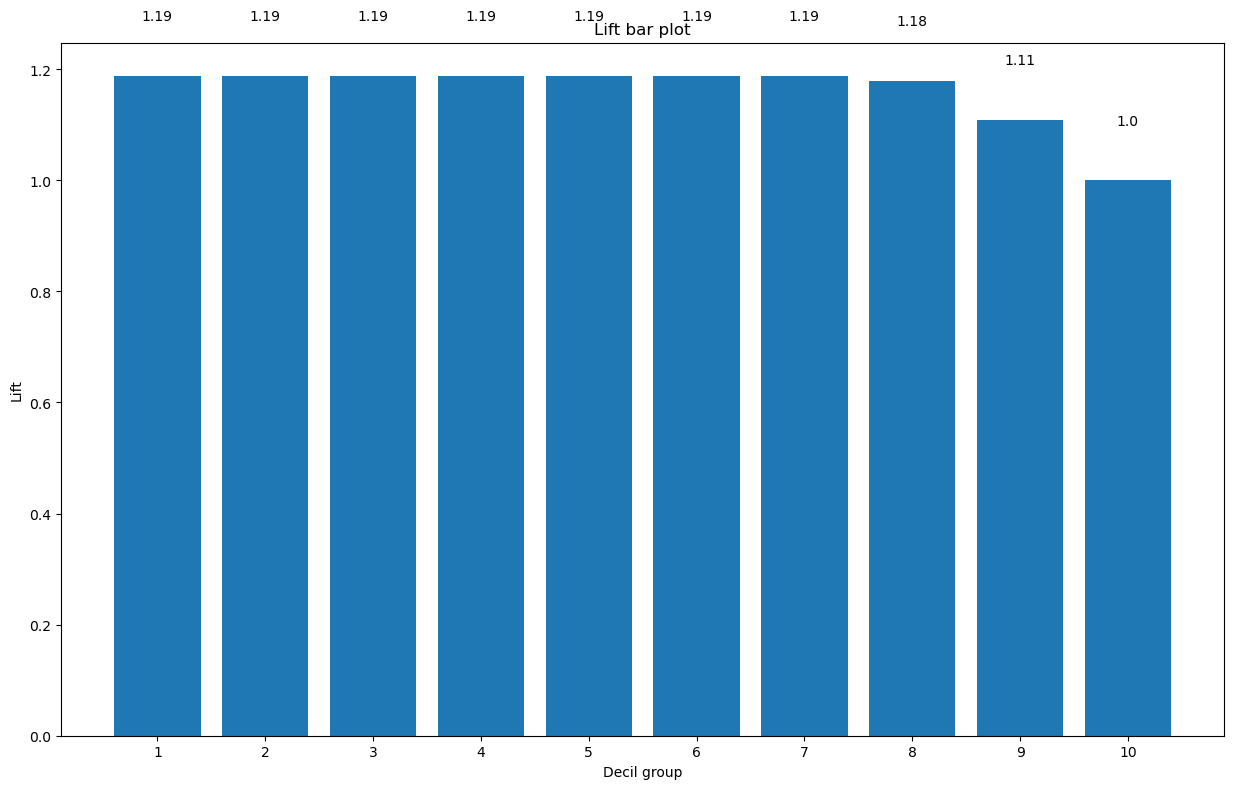

In [129]:
fig,ax=plt.subplots(figsize=(15,9))
barplot=plt.bar(lift_gain_report['Decil group'],lift_gain_report['Lift'])
plt.title('Lift bar plot')
plt.xlabel('Decil group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decil group'])

for b in barplot:
    plt.text(b.get_x()+b.get_width()/2,b.get_height()+0.1,round(b.get_height(),2),ha='center')
    
plt.show()

Interpretare: Observam ca pentru 7 dintre cele 10 valori din Decil Group, variablia Lift va avea valoare 1,19. Pentru valoarea 8 din Decil Group, Lift este egal cu 1,18, pentru valoarea 9 , 1,11 si pentru valoarea 10 are valoarea 1.

b) Graficul pentru Gain

In [162]:
lift_gain_report['Random Selection']=lift_gain_report['Decil group']/lift_gain_report['Decil group'].max()

([<matplotlib.axis.YTick at 0x18c6af534c0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.17, '0.17'),
  Text(0, 0.29, '0.29'),
  Text(0, 0.41, '0.41'),
  Text(0, 0.52, '0.52'),
  Text(0, 0.64, '0.64'),
  Text(0, 0.76, '0.76'),
  Text(0, 0.88, '0.88'),
  Text(0, 1.0, '1.00')])

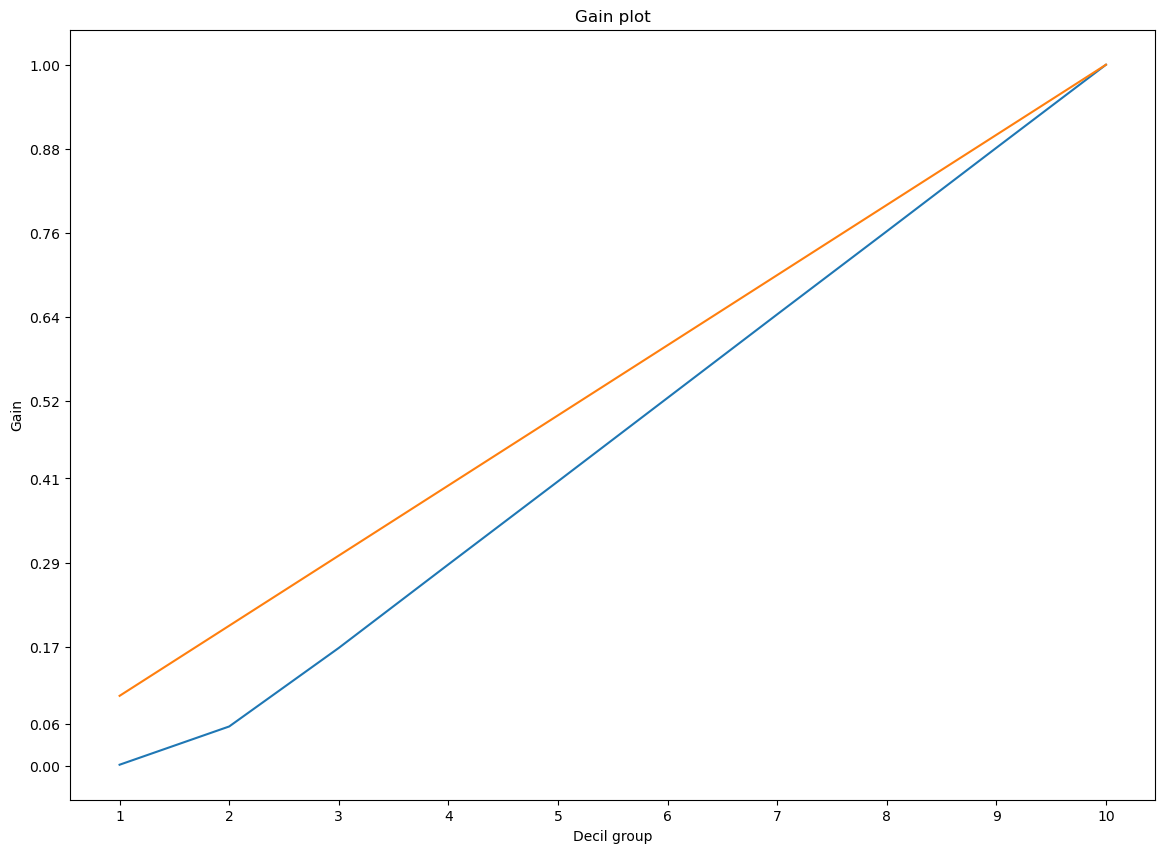

In [163]:
fig,ax=plt.subplots(figsize=(14,8))
sns.lineplot(data=lift_gain_report,x=lift_gain_report['Decil group'],y=lift_gain_report['Gain'])
sns.lineplot(data=lift_gain_report,x=lift_gain_report['Decil group'],y=lift_gain_report['Random Selection'])
plt.title('Gain plot')
plt.xticks(lift_gain_report['Decil group'])
plt.yticks(round(lift_gain_report['Gain'],2))

Interpretare: Se poate vedea cum pentru fiecare valoare din Decil group , Gain va avea o valoare diferita. In pct 1 va fi egala cu 0, in pct 2 va fi egala cu 0,06, in pct 3 va fi egala cu 0,17, in pct 4 va fi egala cu 0,29, in pct 5 va fi egala cu 0,41, in pct 6 va fi egala cu 0,52, in pct 7 va fi egala cu 0,64, in pct 8 va fi egala cu 0,76, in pct 9 va fi egala cu 0,88, iar in pct 10 valoare va ajunge la 1.

### Importanta caracteristicilor

In [134]:
feat_imp=xgb.get_booster().get_score(importance_type='total_gain')
feat_imp

{'CLIENTNUM': 337.0828552246094,
 'Customer_Age': 1529.3056640625,
 'Dependent_count': 132.06858825683594,
 'Months_on_book': 615.2696533203125,
 'Total_Relationship_Count': 3694.20458984375,
 'Months_Inactive_12_mon': 1212.135986328125,
 'Contacts_Count_12_mon': 903.0044555664062,
 'Credit_Limit': 815.6828002929688,
 'Total_Used_Bal': 5177.43310546875,
 'Total_Unused_Bal': 625.514892578125,
 'Total_Amt_Chng_Q4_Q1': 2801.148193359375,
 'Total_Trans_Amt': 11249.3623046875,
 'Total_Trans_Ct': 11149.4453125,
 'Total_Ct_Chng_Q4_Q1': 4541.037109375,
 'Avg_Utilization_Ratio': 1186.154296875,
 'Education_Level_College': 10.916389465332031,
 'Education_Level_Doctorate': 3.8043665885925293,
 'Education_Level_Graduate': 10.775384902954102,
 'Education_Level_High School': 10.846713066101074,
 'Education_Level_Post-Graduate': 5.802804946899414,
 'Education_Level_Uneducated': 11.02813720703125,
 'Education_Level_Unknown': 8.50363540649414,
 'Marital_Status_Divorced': 9.740646362304688,
 'Marital_St

In [135]:
feature_importance=pd.DataFrame()
feature_importance['Variable']=feat_imp.keys()
feature_importance['Importance Value']=feat_imp.values()
feature_importance['%Importance Feature']=feature_importance['Importance Value']/feature_importance['Importance Value'].sum()*100
feature_importance.sort_values(by=['Importance Value'],ascending=True)

,Variable,Importance Value,%Importance Feature
27,Income_Category_$40K - $60K,1.507605,0.003247
16,Education_Level_Doctorate,3.804367,0.008194
19,Education_Level_Post-Graduate,5.802805,0.012499
31,Income_Category_Unknown,5.852596,0.012606
21,Education_Level_Unknown,8.503635,0.018316
29,Income_Category_$80K - $120K,8.905509,0.019182
22,Marital_Status_Divorced,9.740646,0.020980
17,Education_Level_Graduate,10.775385,0.023209
18,Education_Level_High School,10.846713,0.023363
15,Education_Level_College,10.916389,0.023513


### Graficele SHAP

In [142]:
import shap

explainer=shap.TreeExplainer(xgb)
shap_values=explainer.shap_values(X_test)
shap_values

array([[ 0.04779819, -0.16809815, -0.02426933, ...,  0.00058599,
         0.01383665, -0.0003608 ],
       [ 0.04676734, -0.11945987, -0.04687361, ..., -0.00479998,
         0.01643804, -0.00041905],
       [ 0.14659846, -0.10013846, -0.01258962, ...,  0.00660091,
         0.01569512, -0.0005992 ],
       ...,
       [ 0.08655098, -0.23870268, -0.02981216, ..., -0.00320706,
         0.00855534,  0.0046726 ],
       [ 0.02689816, -0.06554399, -0.02622731, ...,  0.00042218,
         0.02002614, -0.00062051],
       [-0.01122317, -0.10594083, -0.02742577, ...,  0.00455419,
         0.02909476,  0.00176551]], dtype=float32)

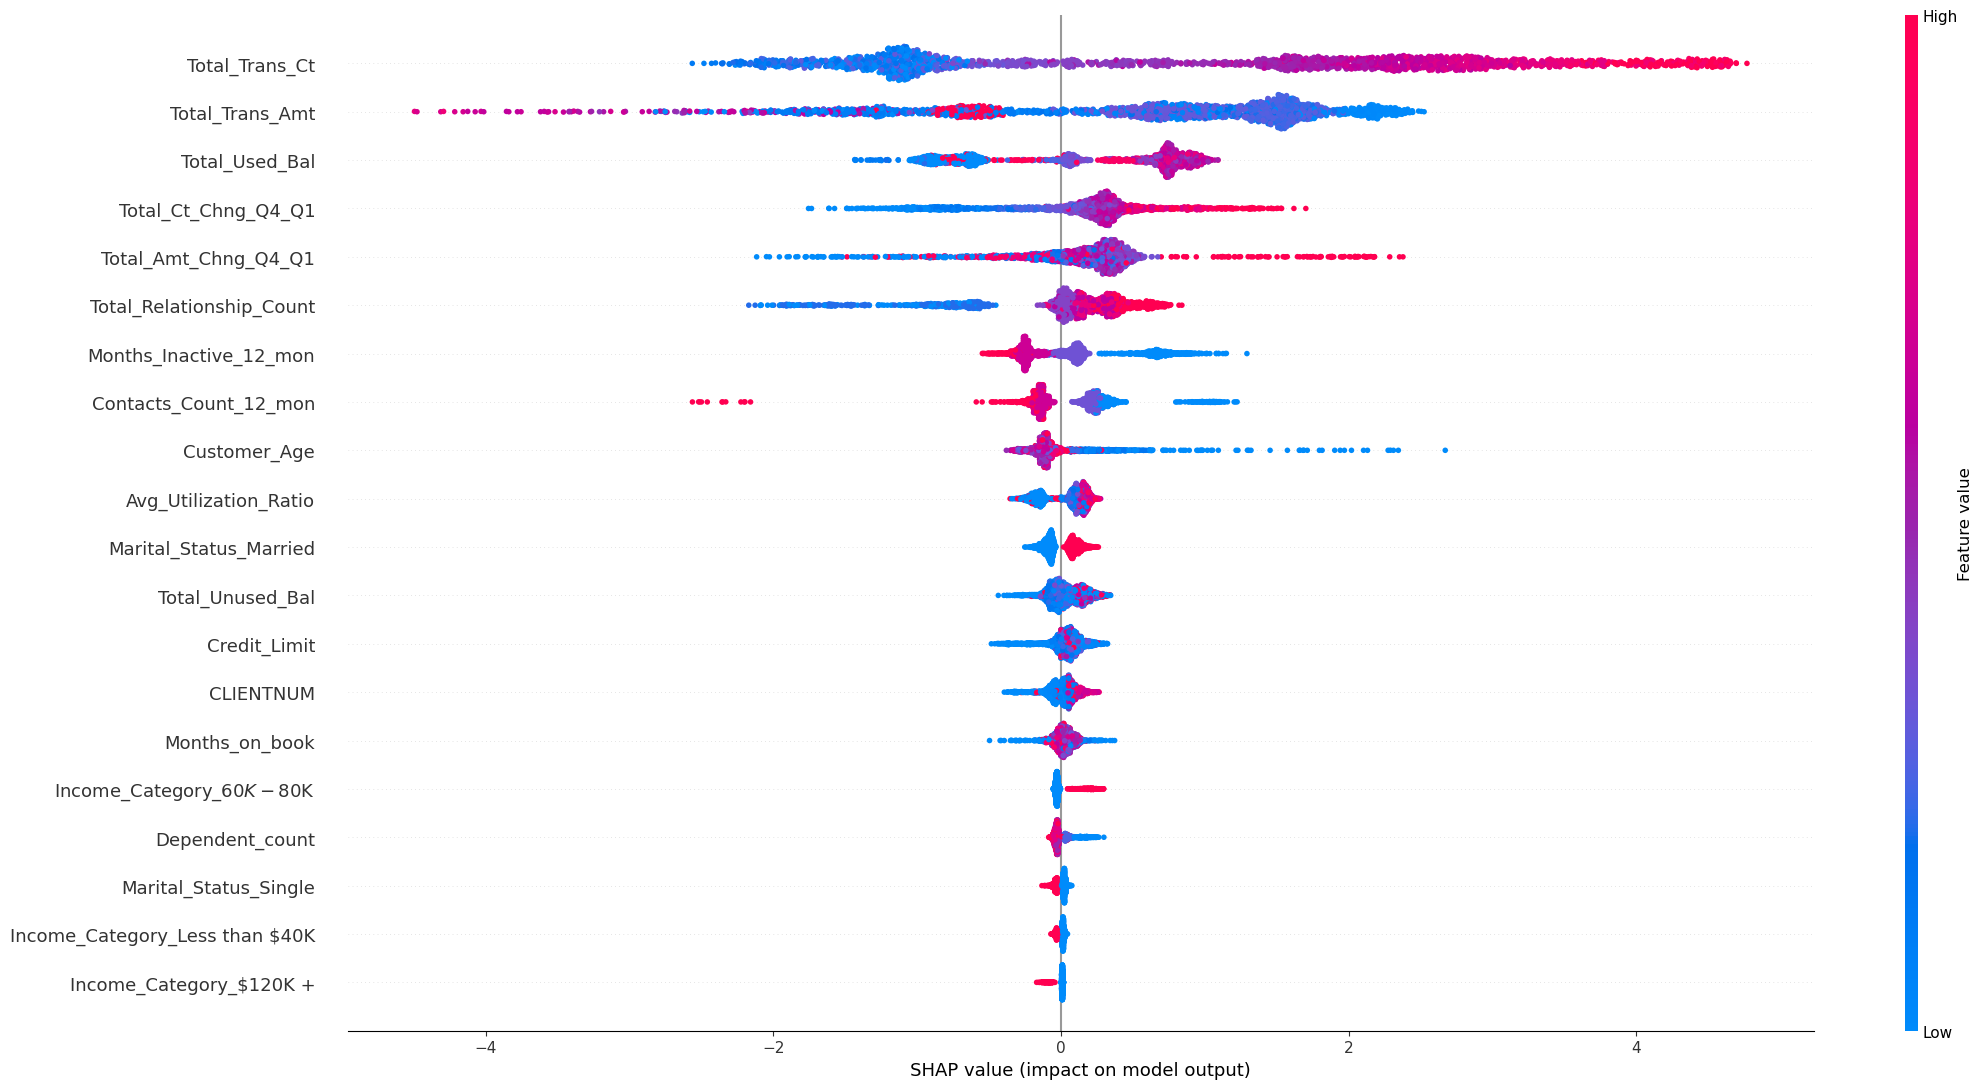

In [144]:
shap.summary_plot(shap_values,X_test,plot_size=(22,11))

Interpretare: Putem remarca urmatoarele aspecte: Variabila Total_Trans_Ct are cel mai mare impact pozitiv asupra luarii unei decizii de a ramane in banca. Variabila Total_Trans_Amt, va avea un impact mai mare in cazul in care un client vrea sa paraseasca banca decat in cazul in care acesta si-ar dori sa ramana. Total_Used_Bal va influenta mai mult in directia pozitiva, desi nu se poate ignora si impactul in cazul negativ. Aceleasi aspecte sunt valavile si pentru variabila Total_Relationship_Count. Acest trend se manifesta invers in cazul variabilelor Months_Inactive_12_mon si Contacts_Count_12_mon. Cu cat clientul e mai inactiv si mai neintegrat in sistem, cu atat mai mari sunt sansele ca el sa iasa din reteaua bancara. Impactul pe care il va avea varsta clientului va fi redus, in timp ce variabilele Total_Ct_Chng_Q4_Q1 si Total_Amt_Chng_Q4_Q1 arata ca un client cu o implicare mare are sanse mai mari sa ramana. Acelasi aspect este valabil si pentru Avg_Utilization_Ratio, iar clientii casatoriti sunt predispusi sa ramana, in timp ce persoanele necasatorite nu vor fi iinfluentate major de acest aspect. Impactul celolrlate variabile este redus si nu va influenta intr-un mod major decizia clientului de a ramane sau a parasi banca. 

Observatii individuale

In [145]:
index=123
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index],X_test.iloc[index])

In [146]:
index=79
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index],X_test.iloc[index])

In [147]:
index=100
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index],X_test.iloc[index])

In [148]:
index=219
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index],X_test.iloc[index])

In [149]:
index=17
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index],X_test.iloc[index])

Acuratetea probei

In [150]:
pr=pd.DataFrame()
pr['proba']=y_predict_proba_class_1
pr[pr['proba']==pr['proba'].max()]

,proba
1070,0.999916


Avem o acuratete a rezultatelor de peste 99%.

# F. Salvarea finala a datelor

In [151]:
data.to_csv('C:\\Users\\Gucci\\Desktop\\TTJ project\\TTJ project\\dataset\\dataset.csv')

In [158]:
with open('C:\\Users\\Gucci\\Desktop\\TTJ project\\TTJ project\\final_model.pkl','wb') as file:
    pickle.dump(best_model,file)